# 1. Install and import essential libraries

In [ ]:
# Install Essential Libraries
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 15.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

# 2. Dataset

##2.1.1. Show some images from Trainset

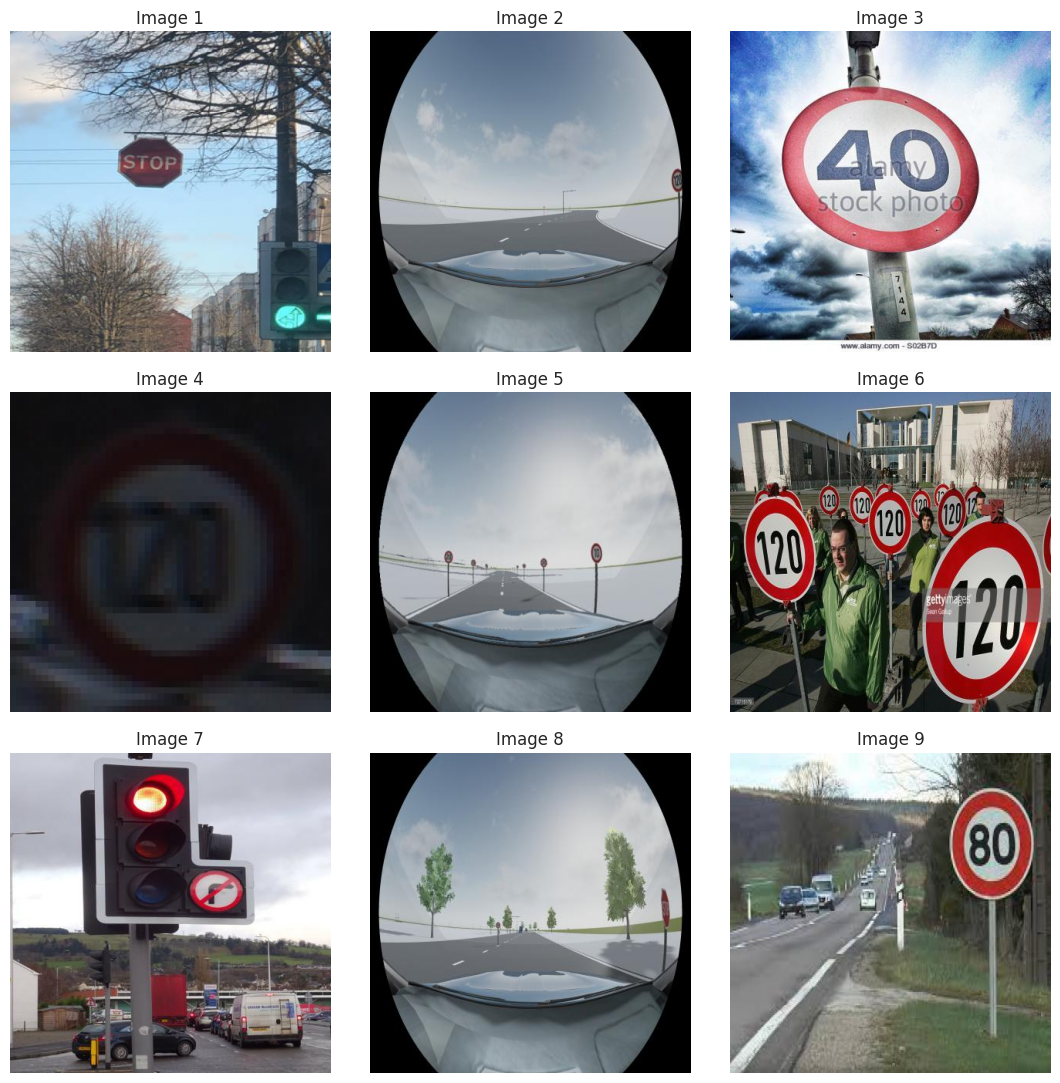

In [ ]:
Image_dir = '/content/drive/MyDrive/DL/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

##2.1.2. Get Shape Of An Image For Using In Training Step

- width: 가로 방향 픽셀 수
- height: 세로 방향 픽셀 수
- channels: 색상정보를 나타내는 채널의 수

In [ ]:
# Get the size of the image
image = cv2.imread("/content/drive/MyDrive/DL/train/images/00000_00005_00011_png.rf.4d19637de6d9dad7b58d4f3fcc06fcc1.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


# 3. YOLOv8-Based 모델 훈련

## 3.1. 훈련1

In [ ]:
# yolo 모델을 초기화하고, 모델의 구조를 설정한 후 사전학습된 가중치를 모델에 로드함
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Training The Final Model with Early Stopping
Result_Final_model = Final_model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,              # 총 10번의 에포크 동안 훈련
    imgsz=416,              # 입력 이미지 크기
    batch=64,               # 배치 크기
    lr0=0.001,              # 초기 학습률을 0.001로 설정
    dropout=0.15,           # 드롭아웃 비율
    device=0,               # GPU 0번 장치 사용
    patience=2              # Early Stopping 설정: 2번의 에포크 동안 성능 향상이 없으면 종료
)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=2, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.89G     0.8267      3.622       1.07         14        416: 100%|██████████| 56/56 [01:16<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.63s/it]

                   all        801        944      0.236      0.545       0.19      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G     0.7008      2.456     0.9585         14        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.63s/it]

                   all        801        944      0.282      0.475      0.336      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.13G     0.6859      1.983     0.9474         12        416: 100%|██████████| 56/56 [00:52<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.40s/it]


                   all        801        944      0.554      0.541      0.556      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.13G     0.6681      1.634     0.9371         12        416: 100%|██████████| 56/56 [00:49<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]

                   all        801        944      0.669      0.649      0.695      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.13G     0.6339      1.313     0.9202          9        416: 100%|██████████| 56/56 [00:52<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

                   all        801        944      0.727      0.684      0.746      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.13G      0.615      1.129     0.9068         12        416: 100%|██████████| 56/56 [00:49<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

                   all        801        944      0.786       0.72      0.796      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.13G     0.5832     0.9749     0.8918         12        416: 100%|██████████| 56/56 [00:49<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.71s/it]

                   all        801        944      0.898      0.717      0.837      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.12G     0.5626      0.865     0.8867         10        416: 100%|██████████| 56/56 [00:49<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]

                   all        801        944      0.885      0.795      0.859      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.13G     0.5397     0.7869     0.8821         15        416: 100%|██████████| 56/56 [00:55<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]

                   all        801        944      0.911      0.796      0.872      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.13G     0.5161     0.7345     0.8722         10        416: 100%|██████████| 56/56 [00:57<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.81s/it]

                   all        801        944      0.908      0.813      0.883      0.767



10 epochs completed in 0.186 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.06s/it]


                   all        801        944      0.907      0.814      0.883      0.767
           Green Light         87        122      0.824      0.574      0.663       0.38
             Red Light         74        108      0.783      0.568      0.674      0.397
       Speed Limit 100         52         52      0.852      0.942      0.936      0.851
       Speed Limit 110         17         17      0.932      0.824      0.892      0.854
       Speed Limit 120         60         60      0.958      0.883      0.975      0.884
        Speed Limit 20         56         56      0.981      0.914      0.968       0.84
        Speed Limit 30         71         74      0.958      0.905      0.957        0.9
        Speed Limit 40         53         55      0.859      0.909      0.941       0.84
        Speed Limit 50         68         71      0.972      0.761      0.902      0.802
        Speed Limit 60         76         76      0.911      0.811      0.911      0.825
        Speed Limit 7

### 3.1.2. 훈련1에 대한 validation

In [ ]:
# 데이터셋
train_images = '/content/drive/MyDrive/DL/train/images'
val_images = '/content/drive/MyDrive/DL/valid/images'
test_images = '/content/drive/MyDrive/DL/test/images'
train_labels = '/content/drive/MyDrive/DL/train/labels'
val_labels = '/content/drive/MyDrive/DL/valid/labels'
test_labels = '/content/drive/My Drive/DL/test/labels'

In [ ]:
# 이미지 설정
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

In [ ]:
# Ensure that the metrics file paths are correct
metrics_base_path = 'runs/detect/train2/'

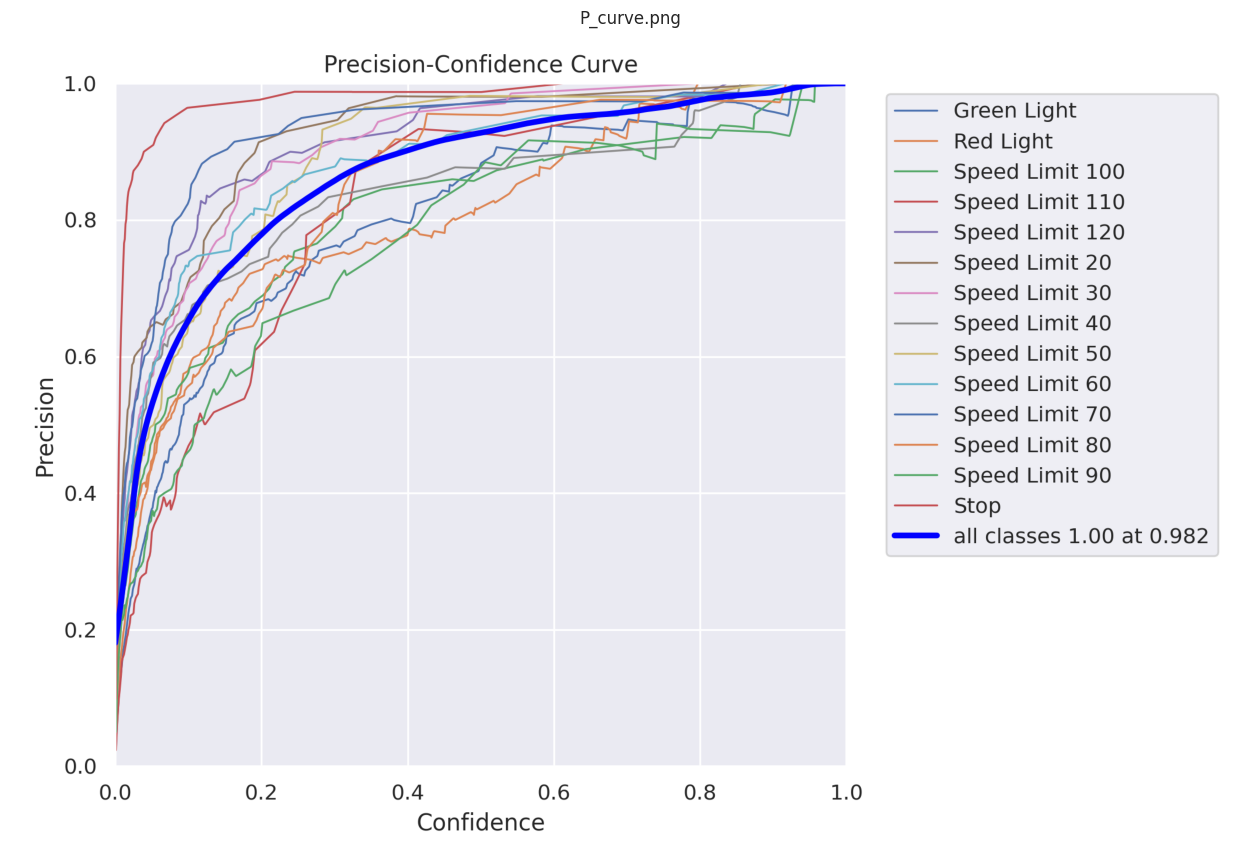

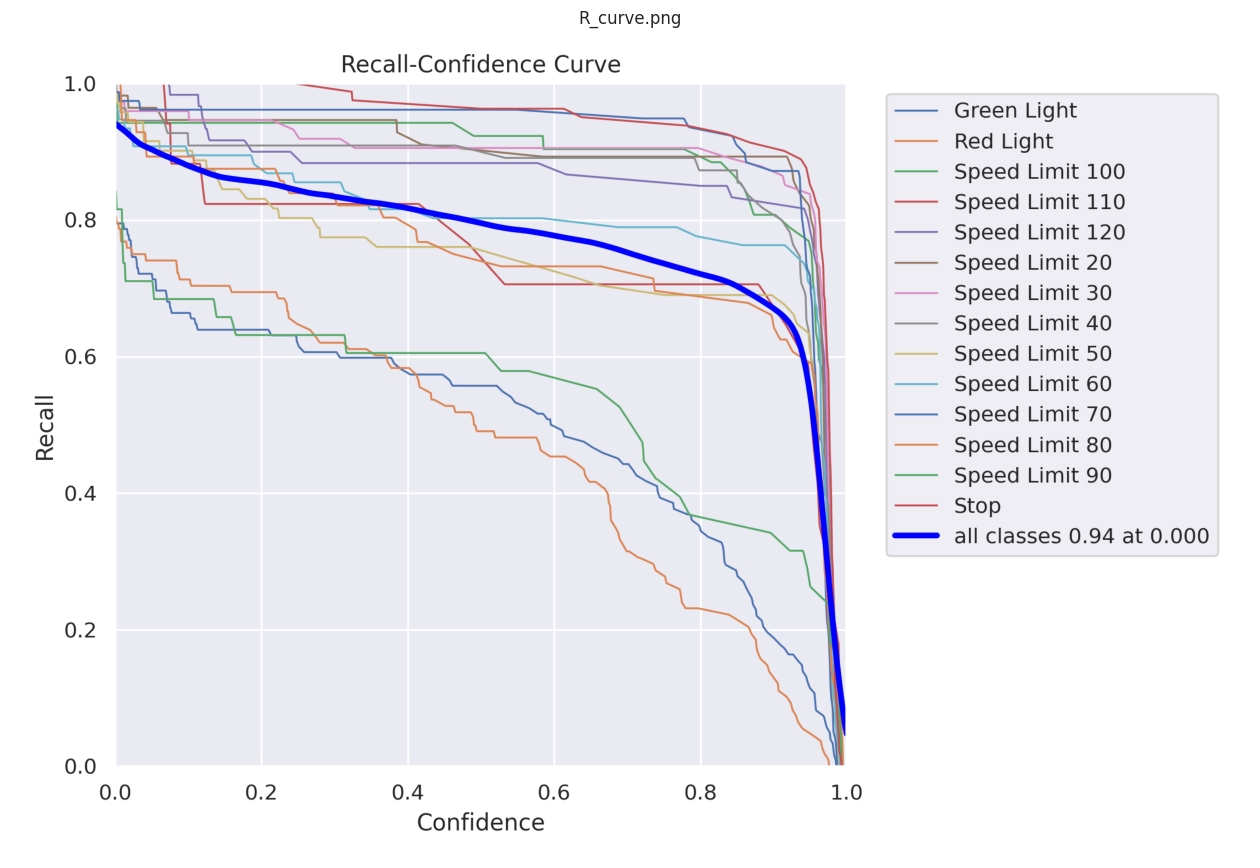

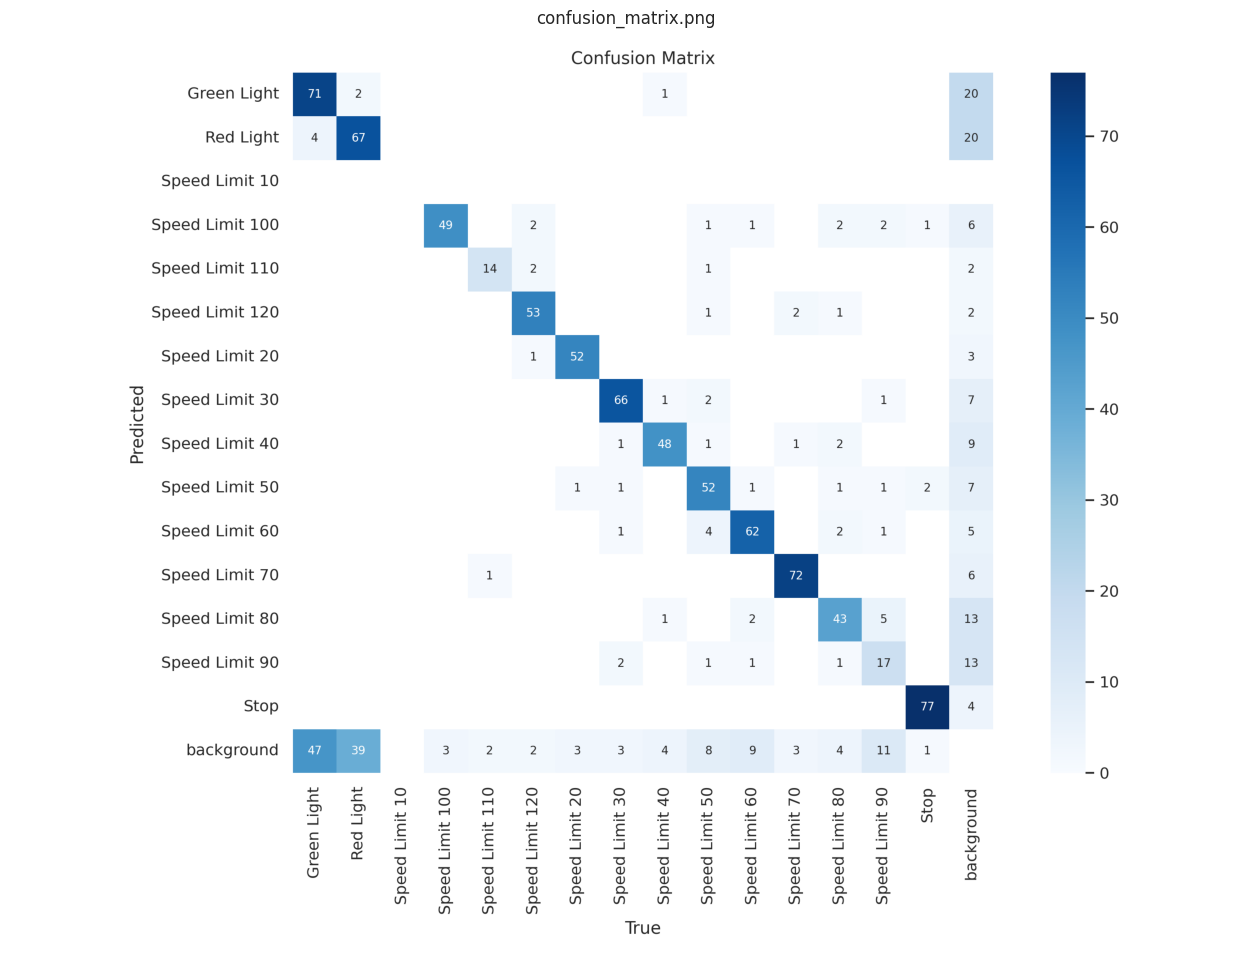

In [ ]:
# Check if each metric file exists
for metric_file in list_of_metrics:
    metric_path = os.path.join(metrics_base_path, metric_file)
    if not os.path.exists(metric_path):
        print(f"File not found: {metric_path}")
        continue

    # Load the image
    image = cv2.imread(metric_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f")Failed to load image: {metric_path}")
        continue

    # Convert BGR (OpenCV default) to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image_rgb)
    plt.title(metric_file)

    # Show the plot
    plt.axis('off')  # Hide axes ticks
    plt.show()

###3.1.2.2. 시각화

              Class  Images  Instances  Box(P)      R  mAP50  mAP50-95
0               all     801        944   0.907  0.814  0.883     0.767
1       Green Light      87        122   0.824  0.574  0.663     0.380
2         Red Light      74        108   0.783  0.568  0.674     0.397
3   Speed Limit 100      52         52   0.852  0.942  0.936     0.851
4   Speed Limit 110      17         17   0.932  0.824  0.892     0.854
5   Speed Limit 120      60         60   0.958  0.883  0.975     0.884
6    Speed Limit 20      56         56   0.981  0.914  0.968     0.840
7    Speed Limit 30      71         74   0.958  0.905  0.957     0.900
8    Speed Limit 40      53         55   0.859  0.909  0.941     0.840
9    Speed Limit 50      68         71   0.972  0.761  0.902     0.802
10   Speed Limit 60      76         76   0.911  0.811  0.911     0.825
11   Speed Limit 70      78         78   0.966  0.962  0.973     0.876
12   Speed Limit 80      56         56   0.916  0.768  0.897     0.782
13   S

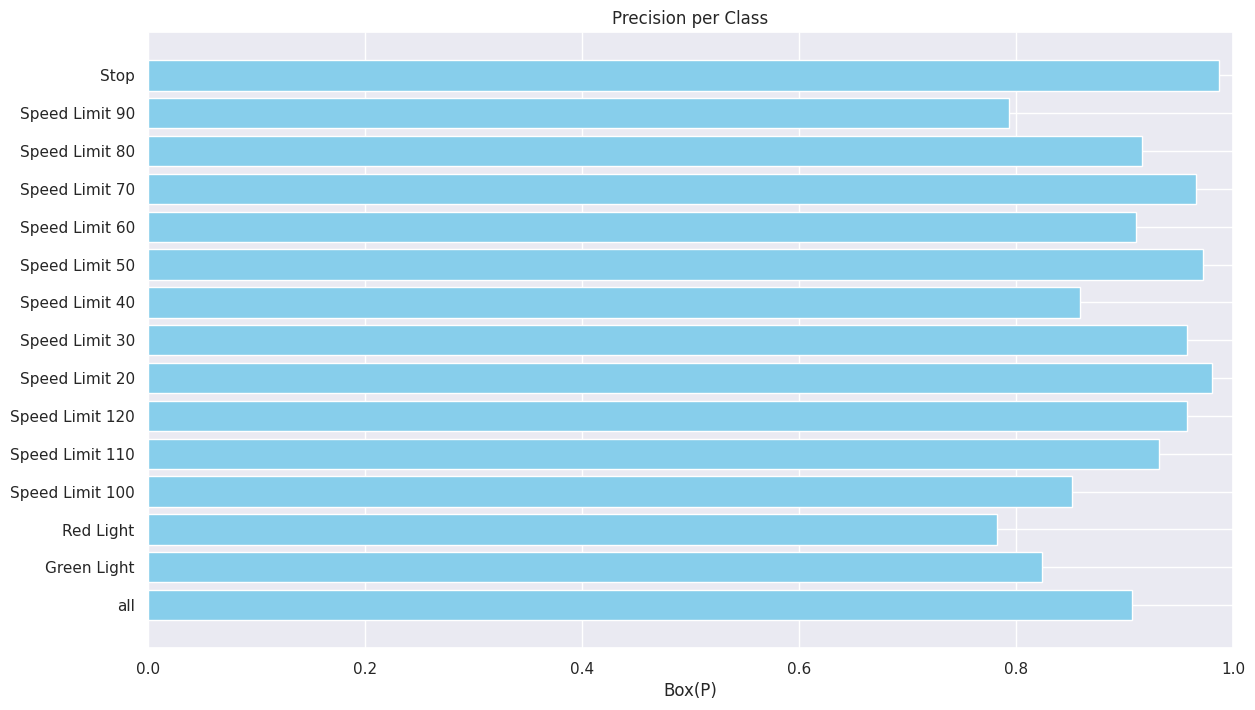

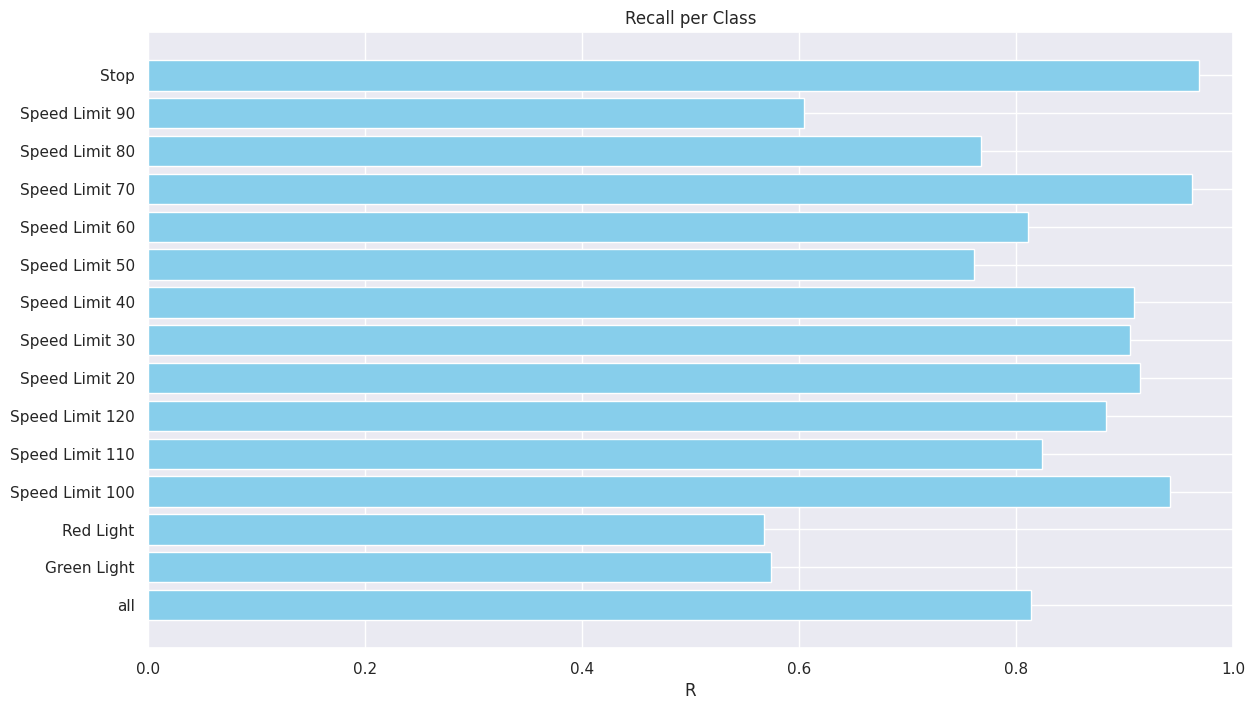

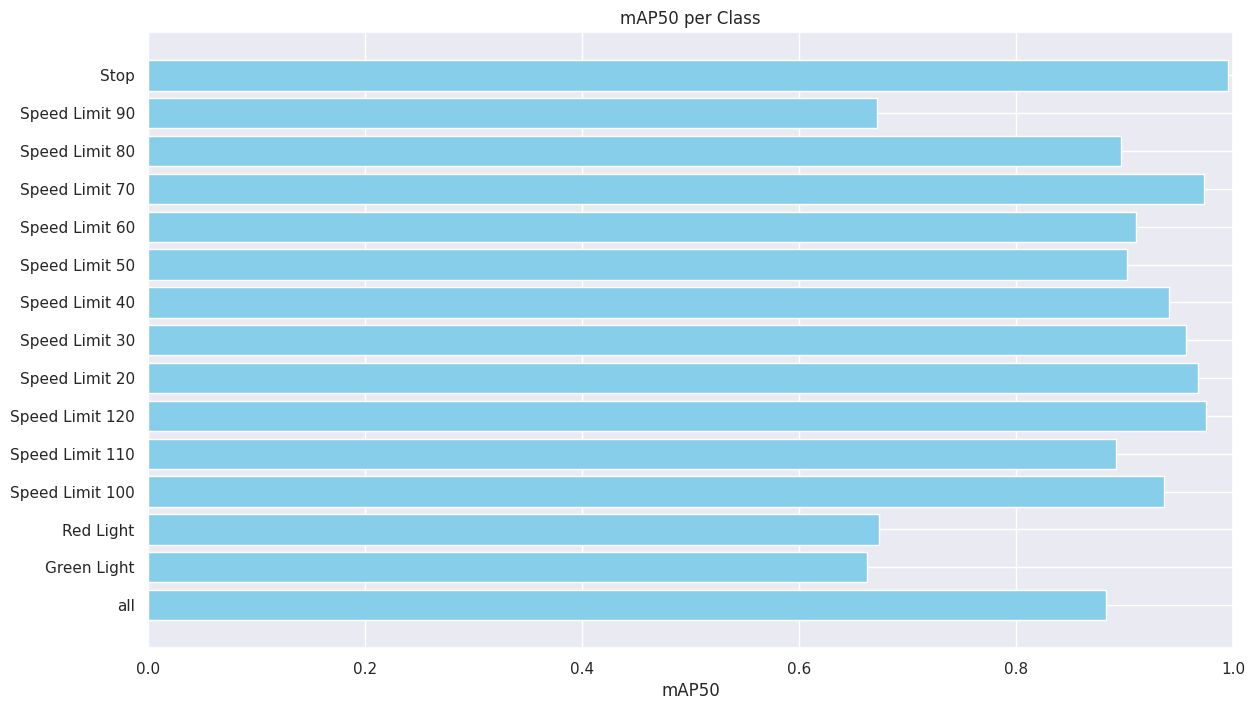

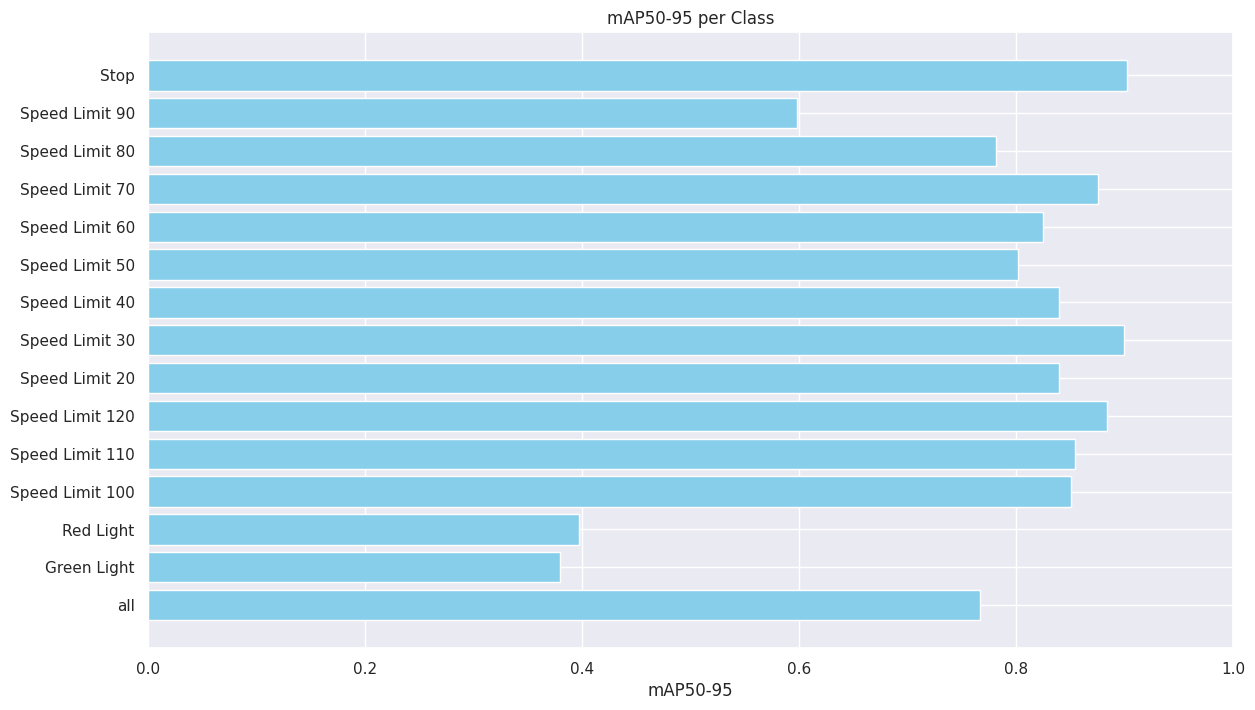

In [ ]:
# Function to load and display images
# def display_images(image_files, base_path, figsize=(16, 12)):
#     for metric_file in image_files:
#         metric_path = os.path.join(base_path, metric_file)
#         if not os.path.exists(metric_path):
#             print(f"File not found: {metric_path}")
#             continue

#         image = cv2.imread(metric_path)
#         if image is None:
#             print(f"Failed to load image: {metric_path}")
#             continue

#         image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         plt.figure(figsize=figsize)
#         plt.imshow(image_rgb)
#         plt.title(metric_file)
#         plt.axis('off')
#         plt.show()

# Display predefined metrics
# display_images(list_of_metrics, metrics_base_path)

# Validation metrics summary
validation_summary = {
    "Class": ["all", "Green Light", "Red Light", "Speed Limit 100", "Speed Limit 110", "Speed Limit 120",
              "Speed Limit 20", "Speed Limit 30", "Speed Limit 40", "Speed Limit 50", "Speed Limit 60",
              "Speed Limit 70", "Speed Limit 80", "Speed Limit 90", "Stop"],
    "Images": [801, 87, 74, 52, 17, 60, 56, 71, 53, 68, 76, 78, 56, 38, 81],
    "Instances": [944, 122, 108, 52, 17, 60, 56, 74, 55, 71, 76, 78, 56, 38, 81],
    "Box(P)": [0.907, 0.824, 0.783, 0.852, 0.932, 0.958, 0.981, 0.958, 0.859, 0.972, 0.911, 0.966, 0.916, 0.794, 0.987],
    "R": [0.814, 0.574, 0.568, 0.942, 0.824, 0.883, 0.914, 0.905, 0.909, 0.761, 0.811, 0.962, 0.768, 0.605, 0.969],
    "mAP50": [0.883, 0.663, 0.674, 0.936, 0.892, 0.975, 0.968, 0.957, 0.941, 0.902, 0.911, 0.973, 0.897, 0.672, 0.995],
    "mAP50-95": [0.767, 0.38, 0.397, 0.851, 0.854, 0.884, 0.84, 0.9, 0.84, 0.802, 0.825, 0.876, 0.782, 0.598, 0.902]
}

# Convert the summary to a DataFrame for better visualization
df_summary = pd.DataFrame(validation_summary)

# Display the validation summary
print(df_summary)

# Plot the validation metrics
def plot_metrics(df, metric, title):
    plt.figure(figsize=(14, 8))
    plt.barh(df['Class'], df[metric], color='skyblue')
    plt.xlabel(metric)
    plt.title(title)
    plt.xlim(0, 1)
    plt.show()

# Plot Precision, Recall, mAP50 and mAP50-95
plot_metrics(df_summary, 'Box(P)', 'Precision per Class')
plot_metrics(df_summary, 'R', 'Recall per Class')
plot_metrics(df_summary, 'mAP50', 'mAP50 per Class')
plot_metrics(df_summary, 'mAP50-95', 'mAP50-95 per Class')

## 3.2. 훈련2: 배치사이즈 128, 초기학습률 0.0005

In [ ]:
Result_model1 = Final_model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,              # 총 10번의 에포크 동안 훈련
    imgsz=416,              # 입력 이미지 크기
    batch=128,              # 배치 크기 (기본보다 큼)
    lr0=0.0005,             # 초기 학습률 (기본보다 작음)
    dropout=0.15,           # 드롭아웃 비율
    device=0,               # GPU 0번 장치 사용
    patience=3              # Early Stopping 설정: 3번의 에포크 동안 성능 향상이 없으면 종료
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=3, batch=128, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train22
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.01G     0.5174     0.7062     0.8733         95        416: 100%|██████████| 28/28 [01:19<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.18s/it]

                   all        801        944      0.912      0.803       0.88      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.94G     0.5198     0.7107     0.8739         83        416: 100%|██████████| 28/28 [00:48<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.42s/it]

                   all        801        944      0.939      0.765      0.877      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.94G     0.5311     0.7182      0.878         89        416: 100%|██████████| 28/28 [00:50<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.50s/it]

                   all        801        944      0.867      0.786      0.861      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.93G     0.5452      0.714     0.8792         87        416: 100%|██████████| 28/28 [00:46<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all        801        944      0.899      0.737      0.851      0.727
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



4 epochs completed in 0.086 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 6.2MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.18s/it]


                   all        801        944      0.912      0.802       0.88      0.768
           Green Light         87        122      0.894      0.516       0.67      0.379
             Red Light         74        108      0.745      0.611      0.666      0.397
       Speed Limit 100         52         52      0.925      0.904      0.931      0.861
       Speed Limit 110         17         17      0.887      0.765      0.887      0.845
       Speed Limit 120         60         60      0.997      0.883       0.98      0.894
        Speed Limit 20         56         56          1      0.906      0.972      0.848
        Speed Limit 30         71         74      0.915      0.905      0.952       0.89
        Speed Limit 40         53         55       0.96      0.879      0.943      0.835
        Speed Limit 50         68         71          1      0.685      0.912      0.816
        Speed Limit 60         76         76      0.888      0.831      0.897      0.812
        Speed Limit 7

### 3.2.1. 훈련2에 대한 validation

In [ ]:
metrics_base_path22 = 'runs/detect/train22/'

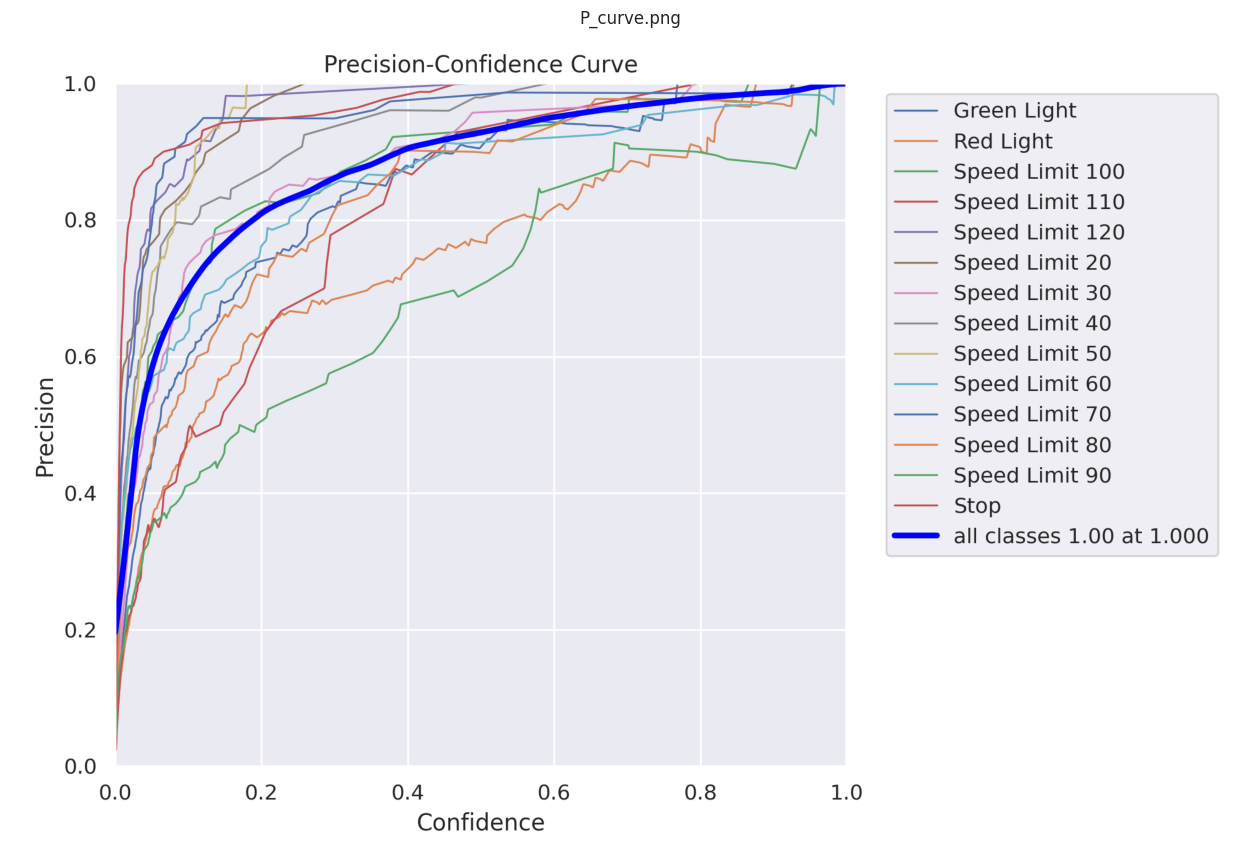

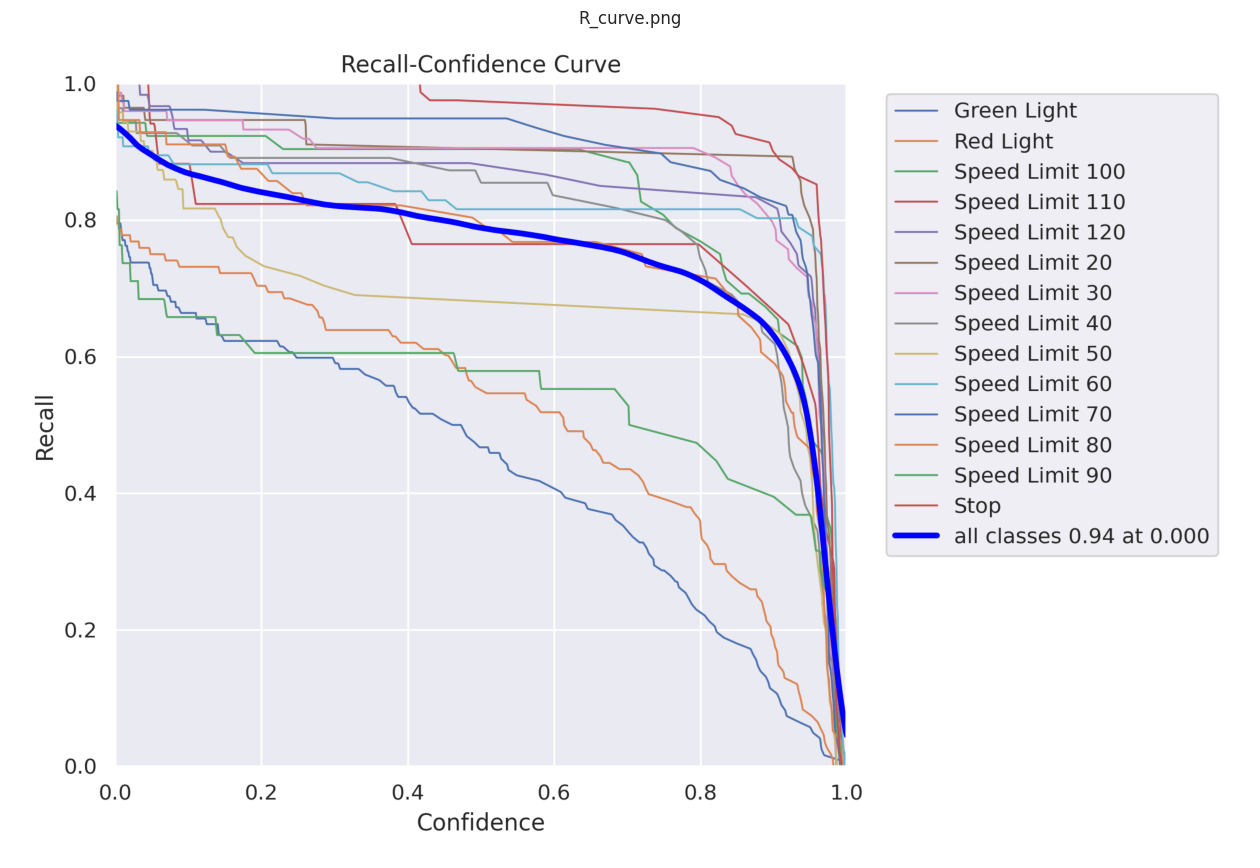

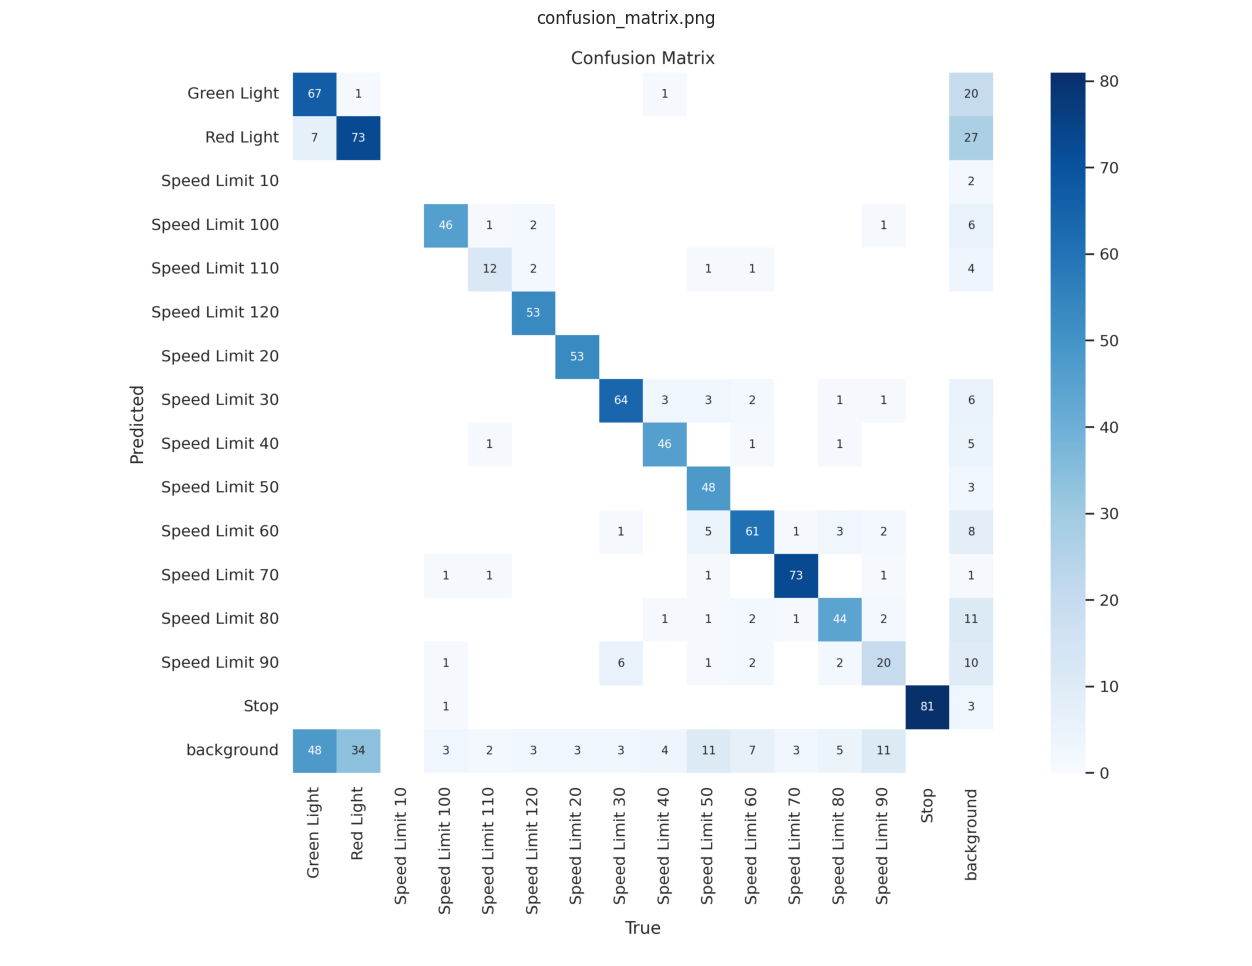

In [ ]:
display_images(list_of_metrics, metrics_base_path22)

## 3.3. 훈련3: 배치 크기 32, 초기학습률 0.001, patience=4

In [ ]:
Result_model2 = Final_model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,
    imgsz=416,
    batch=32,  # 배치 크기 감소
    lr0=0.001,  # 학습률 증가
    dropout=0.15,
    device=0,
    patience=4 # 얼리스탑핑 조절
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train222
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.4G     0.5274      0.737     0.8717         13        416: 100%|██████████| 111/111 [01:35<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all        801        944      0.909      0.808      0.881      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.34G     0.5765     0.7999     0.8942         14        416: 100%|██████████| 111/111 [01:00<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all        801        944       0.87      0.751      0.837      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.35G     0.5915     0.8104     0.9013         12        416: 100%|██████████| 111/111 [01:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.22it/s]

                   all        801        944      0.827      0.723      0.805      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.34G     0.5932     0.7843     0.8979         12        416: 100%|██████████| 111/111 [01:00<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.03it/s]

                   all        801        944      0.874      0.816      0.866      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.35G     0.5828     0.7022      0.893         12        416: 100%|██████████| 111/111 [01:06<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

                   all        801        944      0.889      0.773      0.861      0.737
EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



5 epochs completed in 0.123 hours.
Optimizer stripped from runs/detect/train222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train222/weights/best.pt, 6.2MB

Validating runs/detect/train222/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]


                   all        801        944      0.909      0.808      0.881      0.752
           Green Light         87        122      0.829      0.525      0.634      0.349
             Red Light         74        108      0.813      0.562      0.653      0.382
       Speed Limit 100         52         52       0.82      0.923      0.928      0.819
       Speed Limit 110         17         17      0.964      0.765      0.921       0.84
       Speed Limit 120         60         60      0.963      0.861      0.964      0.874
        Speed Limit 20         56         56      0.954      0.946      0.973      0.827
        Speed Limit 30         71         74      0.971      0.904      0.951      0.867
        Speed Limit 40         53         55       0.92      0.891       0.94      0.821
        Speed Limit 50         68         71      0.981       0.72      0.911      0.798
        Speed Limit 60         76         76      0.918      0.868       0.91      0.819
        Speed Limit 7

### 3.3.1. 훈련3 validation

In [ ]:
metrics_base_path222 = 'runs/detect/train222/'

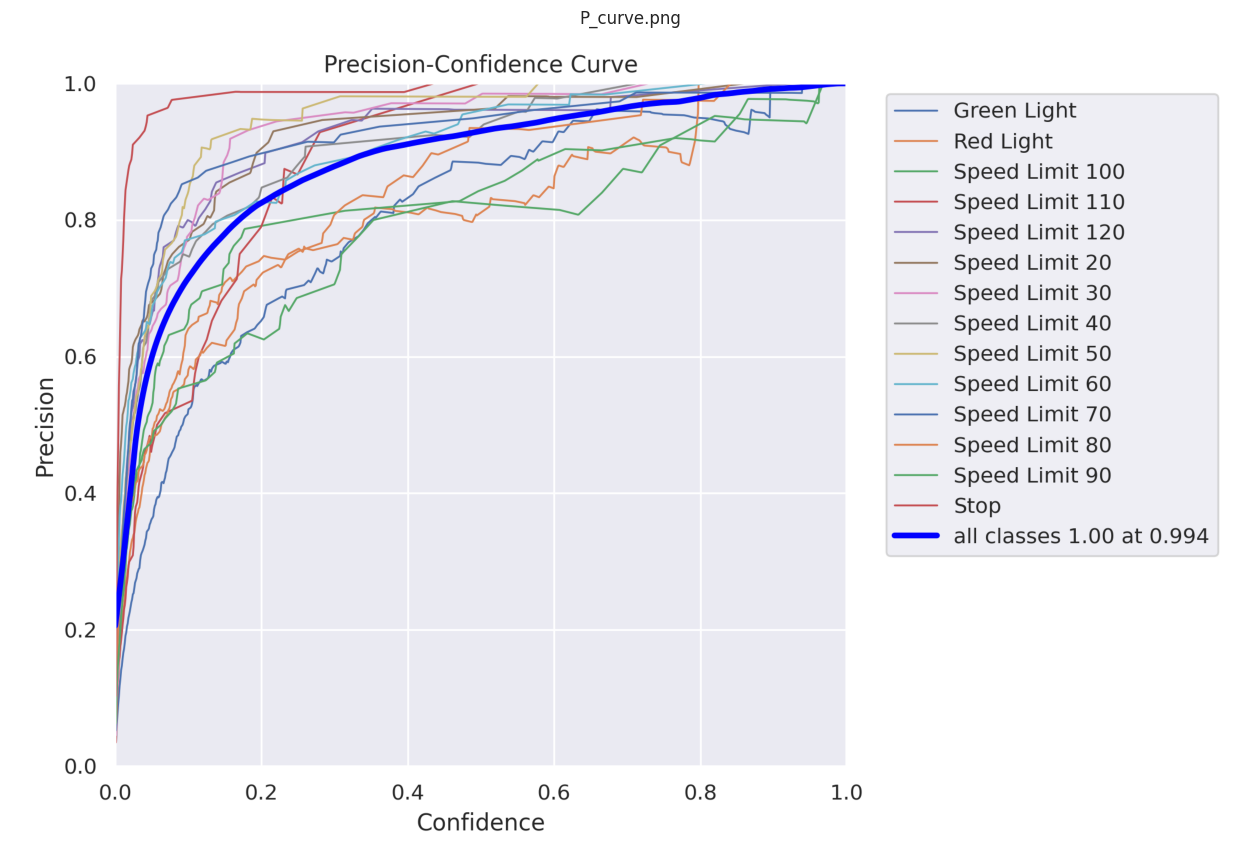

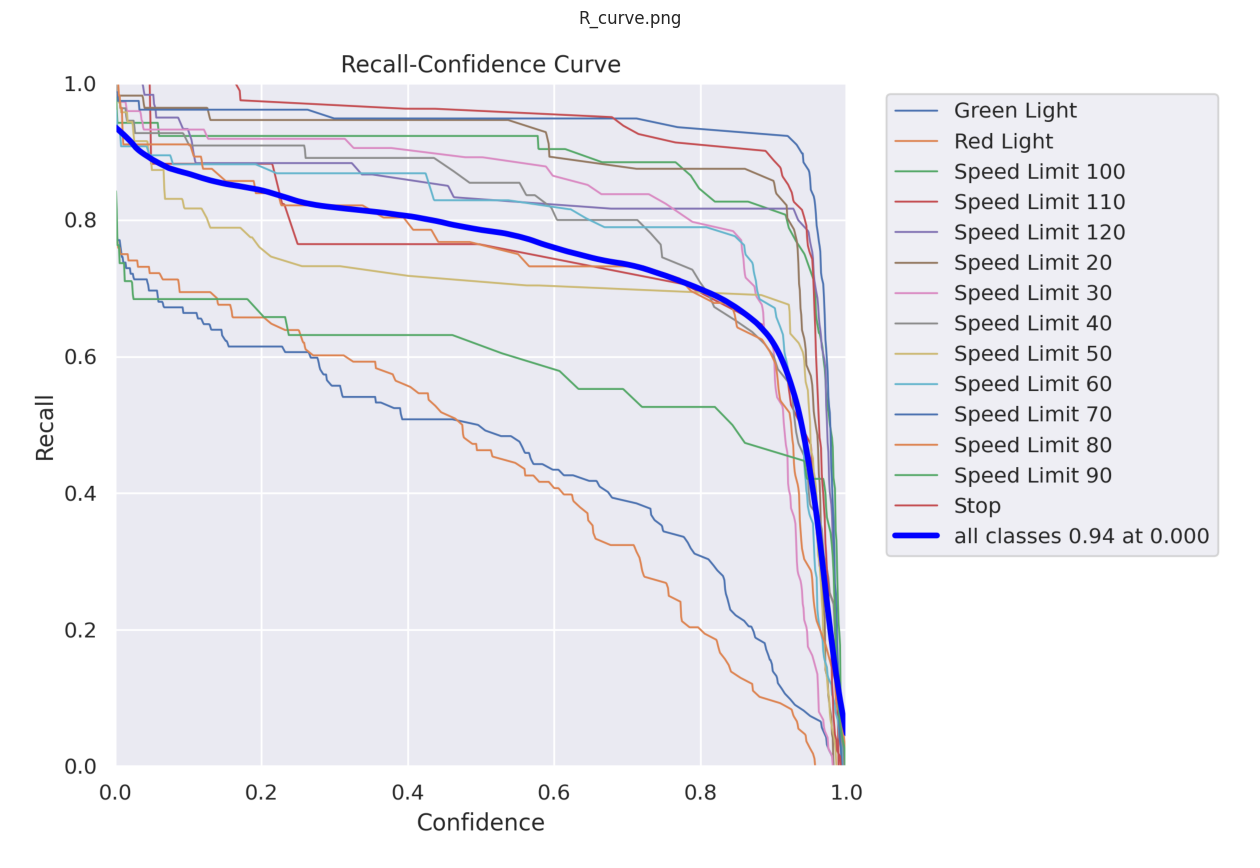

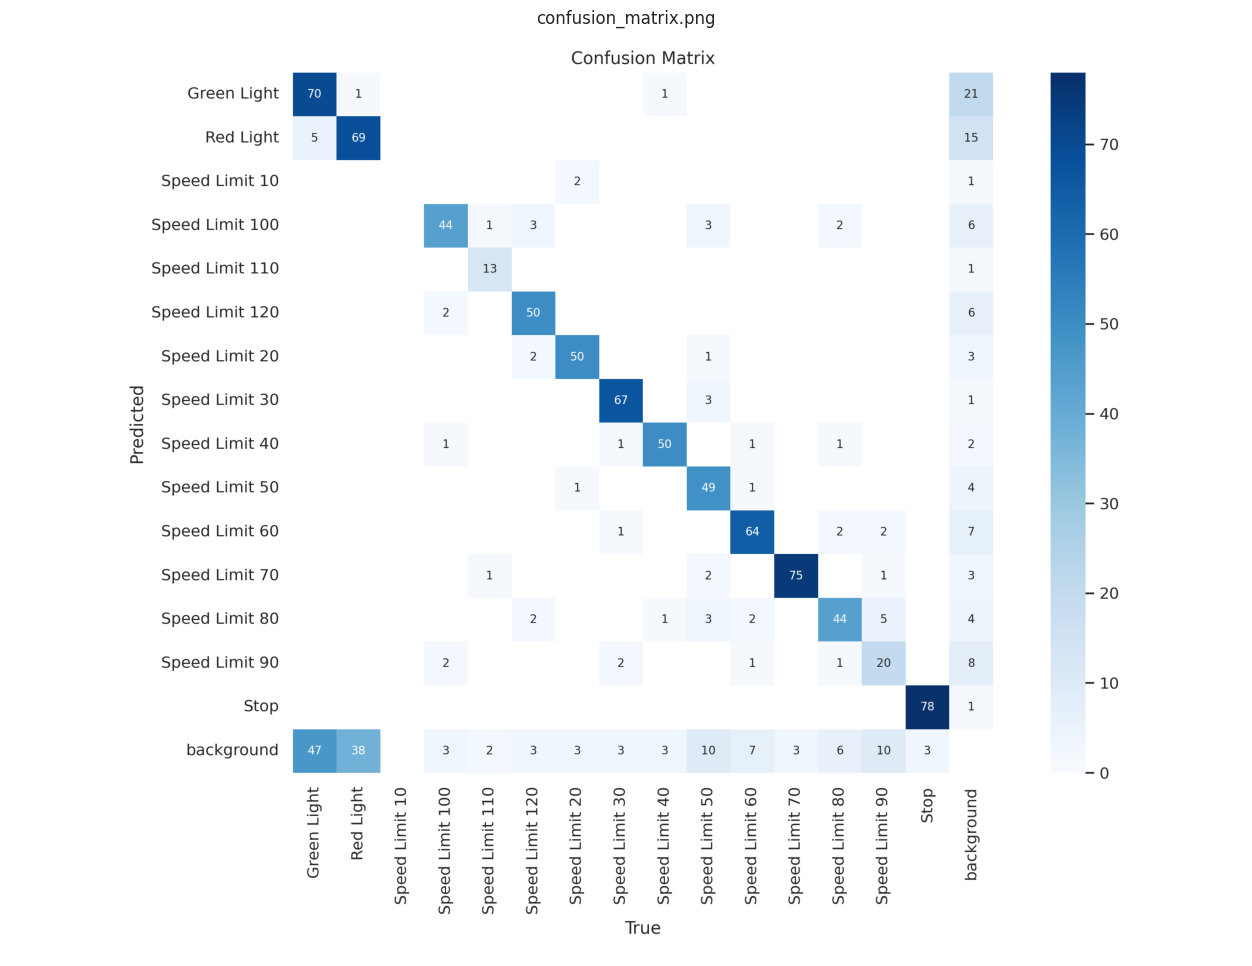

In [ ]:
display_images(list_of_metrics, metrics_base_path222)

## 3.4. 훈련4: 배치 크기 64, lr0=0.00075

In [ ]:
Result_model3 = Final_model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                # 총 10번의 에포크 동안 훈련
    imgsz=416,                # 입력 이미지 크기
    batch=64,                 # 배치 크기 중간 값으로 설정
    lr0=0.00075,              # 학습률 중간 값으로 설정
    dropout=0.15,             # 드롭아웃 비율 유지
    device=0,                 # GPU 0번 장치 사용
    patience=4                # 조기 종료 patience 유지
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00075' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2222
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.22G     0.5031     0.6656     0.8667         14        416: 100%|██████████| 56/56 [01:38<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.57s/it]

                   all        801        944      0.904      0.816      0.879      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.14G     0.5465     0.7215     0.8802         14        416: 100%|██████████| 56/56 [01:03<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.86s/it]

                   all        801        944       0.88      0.754      0.843      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.14G     0.5654     0.7705     0.8895         12        416: 100%|██████████| 56/56 [00:58<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.38s/it]

                   all        801        944      0.792      0.758      0.812      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.14G     0.5813     0.7639     0.8985         12        416: 100%|██████████| 56/56 [01:04<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.05s/it]

                   all        801        944      0.852      0.765      0.835       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.14G     0.5618     0.6761     0.8891          9        416: 100%|██████████| 56/56 [00:54<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]

                   all        801        944      0.861      0.741      0.825      0.702


EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

5 epochs completed in 0.124 hours.
Optimizer stripped from runs/detect/train2222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2222/weights/best.pt, 6.2MB

Validating runs/detect/train2222/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:25<00:00,  3.64s/it]


                   all        801        944      0.905      0.816      0.879      0.758
           Green Light         87        122      0.854      0.576      0.664      0.374
             Red Light         74        108      0.741       0.62      0.652      0.393
       Speed Limit 100         52         52      0.832      0.885      0.914      0.819
       Speed Limit 110         17         17      0.916      0.882      0.909      0.855
       Speed Limit 120         60         60      0.935      0.867       0.96      0.866
        Speed Limit 20         56         56          1      0.908      0.971       0.82
        Speed Limit 30         71         74      0.917      0.919      0.945      0.876
        Speed Limit 40         53         55      0.908      0.899      0.953      0.834
        Speed Limit 50         68         71      0.982      0.748      0.904      0.801
        Speed Limit 60         76         76      0.981      0.816      0.913      0.821
        Speed Limit 7

## 3.5 훈련5: 배치 크기 32, lr0=0.0005, 드롭아웃 0.2

In [ ]:
Result_model4 = Final_model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,
    imgsz=416,
    batch=32,                 # 배치 크기 32
    lr0=0.0005,              # 학습률 0.0005
    dropout=0.2,             # 드롭아웃 비율 0.2로 변경
    device=0,
    patience=4
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.08G     0.7972      3.394      1.039         13        416: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all        801        944      0.247      0.367      0.273      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.03G     0.7135      2.327     0.9613         14        416: 100%|██████████| 111/111 [00:55<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.53it/s]


                   all        801        944      0.409      0.537      0.446      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.06G     0.6827      1.885     0.9429         12        416: 100%|██████████| 111/111 [00:54<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.18it/s]


                   all        801        944      0.549      0.603      0.564      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.05G     0.6567      1.575       0.93         12        416: 100%|██████████| 111/111 [00:49<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.721      0.653      0.725      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.06G     0.6351      1.275     0.9211         12        416: 100%|██████████| 111/111 [00:54<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all        801        944      0.753      0.651      0.737      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.05G     0.6053      1.085     0.9105         12        416: 100%|██████████| 111/111 [00:52<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]

                   all        801        944       0.83      0.735      0.811       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.06G     0.5923     0.9522     0.9012         13        416: 100%|██████████| 111/111 [00:54<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]

                   all        801        944      0.884      0.743      0.829      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.05G     0.5607     0.8528     0.8923         11        416: 100%|██████████| 111/111 [00:59<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        801        944      0.921      0.766      0.864      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.06G     0.5471     0.7738     0.8793         14        416: 100%|██████████| 111/111 [01:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        801        944      0.925      0.793       0.87      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.05G     0.5289     0.7382      0.878         10        416: 100%|██████████| 111/111 [00:55<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.935      0.789       0.88      0.765



10 epochs completed in 0.189 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]


                   all        801        944      0.934      0.789       0.88      0.765
           Green Light         87        122      0.909      0.491      0.682      0.397
             Red Light         74        108      0.879      0.539      0.684      0.412
       Speed Limit 100         52         52      0.942      0.931      0.945      0.856
       Speed Limit 110         17         17      0.906      0.706      0.878      0.822
       Speed Limit 120         60         60      0.933      0.867      0.958      0.879
        Speed Limit 20         56         56      0.984      0.893      0.964      0.836
        Speed Limit 30         71         74      0.915      0.932      0.954      0.883
        Speed Limit 40         53         55      0.936      0.909      0.949      0.835
        Speed Limit 50         68         71      0.985      0.732      0.887      0.795
        Speed Limit 60         76         76      0.979      0.816      0.899      0.829
        Speed Limit 7

### 3.5.1 훈련5에서 체크포인트 저장 실시

In [ ]:
Result_model4_1 = Final_model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,
    imgsz=416,
    batch=32,                 # 배치 크기 32
    lr0=0.0005,              # 학습률 0.0005
    dropout=0.2,             # 드롭아웃 비율 0.2로 변경
    device=0,
    patience=4,
    save_period=1  # 1 에포크마다 체크포인트 저장
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=32, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train42, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train42/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train42
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.16G     0.5387     0.7252     0.8761         13        416: 100%|██████████| 111/111 [01:21<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.883      0.768      0.855      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.05G     0.5768     0.7845     0.8941         14        416: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.66it/s]

                   all        801        944      0.887      0.769      0.857      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.06G     0.5821     0.7646     0.8985         12        416: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

                   all        801        944      0.897      0.724      0.834       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.05G     0.5775     0.7419     0.8935         12        416: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]

                   all        801        944      0.827      0.751      0.826      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.04G     0.5653     0.6895     0.8883         12        416: 100%|██████████| 111/111 [00:54<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all        801        944      0.836      0.781      0.845       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.05G     0.5517     0.6191     0.8869         12        416: 100%|██████████| 111/111 [01:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]

                   all        801        944      0.929      0.787      0.881      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.04G     0.5392     0.5656     0.8771         13        416: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]

                   all        801        944      0.911      0.811       0.88      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.05G     0.5159     0.5191      0.875         11        416: 100%|██████████| 111/111 [00:56<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]

                   all        801        944      0.923      0.813      0.894      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.06G     0.5102     0.4815     0.8662         14        416: 100%|██████████| 111/111 [01:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]

                   all        801        944      0.924      0.821      0.898      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.05G     0.4989     0.4668     0.8674         10        416: 100%|██████████| 111/111 [00:56<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        801        944      0.942      0.815      0.905      0.785



10 epochs completed in 0.212 hours.
Optimizer stripped from runs/detect/train42/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train42/weights/best.pt, 6.2MB

Validating runs/detect/train42/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]


                   all        801        944      0.928      0.826      0.905      0.785
           Green Light         87        122      0.833      0.615      0.726      0.416
             Red Light         74        108      0.883      0.593      0.709      0.413
       Speed Limit 100         52         52      0.853      0.923      0.949      0.863
       Speed Limit 110         17         17      0.804      0.726      0.899       0.83
       Speed Limit 120         60         60      0.967        0.9      0.983      0.914
        Speed Limit 20         56         56          1      0.907      0.981      0.854
        Speed Limit 30         71         74      0.964      0.946       0.97      0.907
        Speed Limit 40         53         55      0.959      0.909      0.976      0.858
        Speed Limit 50         68         71      0.968      0.775      0.934      0.828
        Speed Limit 60         76         76          1       0.88      0.924      0.852
        Speed Limit 7

### 넣을지 나중에 체크

In [ ]:
# Result_model3에서 에포크 1인 모델 저장
# 런타임 초기화된 후에 돌리는 거라 성능은 보장안됨..
Result_model3_1 = Final_model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=1,                # 총 1번의 에포크 동안 훈련
    imgsz=416,               # 입력 이미지 크기
    batch=64,                # 배치 크기 중간 값으로 설정
    lr0=0.00075,             # 학습률 중간 값으로 설정
    dropout=0.15,            # 드롭아웃 비율 유지
    device=0,                # GPU 0번 장치 사용
    patience=4,              # 조기 종료 patience 유지
    save_period=1
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=1, time=None, patience=4, batch=64, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train422, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train422/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00075' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train422
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      3.93G     0.4995     0.4565     0.8631         13        416: 100%|██████████| 56/56 [01:35<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.40s/it]


                   all        801        944      0.877      0.848      0.891      0.768

1 epochs completed in 0.039 hours.
Optimizer stripped from runs/detect/train422/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train422/weights/best.pt, 6.2MB

Validating runs/detect/train422/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.58s/it]


                   all        801        944      0.878      0.848      0.892      0.767
           Green Light         87        122      0.789      0.642      0.715      0.404
             Red Light         74        108      0.826      0.639      0.673      0.404
       Speed Limit 100         52         52       0.83      0.923      0.956       0.87
       Speed Limit 110         17         17      0.512      0.882      0.846      0.782
       Speed Limit 120         60         60      0.983      0.945      0.988      0.898
        Speed Limit 20         56         56      0.987      0.946      0.984       0.85
        Speed Limit 30         71         74      0.868      0.932      0.966      0.888
        Speed Limit 40         53         55      0.944      0.909      0.976      0.839
        Speed Limit 50         68         71      0.982      0.718      0.887      0.782
        Speed Limit 60         76         76      0.964      0.868       0.92      0.842
        Speed Limit 7

##3.6 잘나온 모델 다운로드

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train42/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. 모델 훈련 재실시 - 3.6에서 다운로드한 best model에서 다시 시작

## 4.1. best model 정보 보기

In [ ]:
# 해당 모델 정보 보기
import torch

# 파일 경로
file_path = "/content/runs/detect/train42/weights/best.pt"

# 모델 가중치 로드
model_weights = torch.load(file_path)

# 가중치의 키와 구조를 확인
model_weights.keys()

dict_keys(['epoch', 'best_fitness', 'model', 'ema', 'updates', 'optimizer', 'train_args', 'train_metrics', 'train_results', 'date', 'version', 'license', 'docs'])

In [ ]:
# 모델 객체에서 상태 사전(state dict) 추출
model_state_dict = model_weights['model'].state_dict()

# 가중치의 키와 값을 확인
for key, value in model_state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else type(value)}")

model.0.conv.weight: torch.Size([16, 3, 3, 3])
model.0.bn.weight: torch.Size([16])
model.0.bn.bias: torch.Size([16])
model.0.bn.running_mean: torch.Size([16])
model.0.bn.running_var: torch.Size([16])
model.0.bn.num_batches_tracked: torch.Size([])
model.1.conv.weight: torch.Size([32, 16, 3, 3])
model.1.bn.weight: torch.Size([32])
model.1.bn.bias: torch.Size([32])
model.1.bn.running_mean: torch.Size([32])
model.1.bn.running_var: torch.Size([32])
model.1.bn.num_batches_tracked: torch.Size([])
model.2.cv1.conv.weight: torch.Size([32, 32, 1, 1])
model.2.cv1.bn.weight: torch.Size([32])
model.2.cv1.bn.bias: torch.Size([32])
model.2.cv1.bn.running_mean: torch.Size([32])
model.2.cv1.bn.running_var: torch.Size([32])
model.2.cv1.bn.num_batches_tracked: torch.Size([])
model.2.cv2.conv.weight: torch.Size([32, 48, 1, 1])
model.2.cv2.bn.weight: torch.Size([32])
model.2.cv2.bn.bias: torch.Size([32])
model.2.cv2.bn.running_mean: torch.Size([32])
model.2.cv2.bn.running_var: torch.Size([32])
model.2.cv2.

##4.2. 추가학습

### 4.2.1. 추가학습1

In [ ]:
# 모델 불러오기
model = Final_model.load("/content/runs/detect/train42/weights/best.pt")

# 추가 학습
Result_model4_2 = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 추가로 10 에포크 학습
    imgsz=416,
    batch=32,                   # 배치 크기 유지
    lr0=0.0001,                 # 학습률을 낮춤 (0.0005 -> 0.0001)
    dropout=0.2,                # 드롭아웃 비율 유지
    device=0,
    patience=4,
    save_period=1               # 1 에포크마다 체크포인트 저장
)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=32, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train4222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train4222
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.11G     0.4963     0.4549     0.8607         13        416: 100%|██████████| 111/111 [01:33<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all        801        944      0.884      0.832      0.901      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.07G     0.5304     0.5102     0.8759         14        416: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]

                   all        801        944       0.89      0.788      0.874       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.04G     0.5397     0.5391     0.8799         12        416: 100%|██████████| 111/111 [01:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all        801        944      0.896      0.816      0.886      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.06G      0.543     0.5262     0.8789         12        416: 100%|██████████| 111/111 [00:57<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.00s/it]

                   all        801        944      0.824      0.797      0.848      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.04G     0.5284     0.5036     0.8745         12        416: 100%|██████████| 111/111 [01:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]

                   all        801        944      0.919       0.78      0.879      0.756


EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

5 epochs completed in 0.118 hours.
Optimizer stripped from runs/detect/train4222/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4222/weights/best.pt, 6.2MB

Validating runs/detect/train4222/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.34s/it]


                   all        801        944      0.884      0.832      0.901      0.772
           Green Light         87        122      0.808      0.585      0.704      0.392
             Red Light         74        108      0.802      0.648      0.685       0.41
       Speed Limit 100         52         52      0.888      0.923      0.953      0.849
       Speed Limit 110         17         17      0.617      0.824      0.893      0.796
       Speed Limit 120         60         60      0.964      0.899      0.985      0.894
        Speed Limit 20         56         56      0.977      0.929      0.975      0.839
        Speed Limit 30         71         74      0.944      0.946      0.971      0.904
        Speed Limit 40         53         55      0.889      0.891      0.959      0.839
        Speed Limit 50         68         71          1      0.728      0.926      0.814
        Speed Limit 60         76         76      0.819      0.895      0.922      0.836
        Speed Limit 7

### 4.2.2. 추가학습2

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# 모델 불러오기
model = Final_model.load("/content/runs/detect/train42/weights/best.pt")

# 추가 학습
Result_model4_3 = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 추가로 10 에포크 학습
    imgsz=416,
    batch=128,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률을 낮춤 (0.0005 -> 0.0001)
    dropout=0.2,                # 드롭아웃 비율 유지
    device=0,
    patience=4,
    save_period=1               # 1 에포크마다 체크포인트 저장
)

Transferred 355/355 items from pretrained weights
Transferred 319/355 items from pretrained weights
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=128, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       7.9G     0.5322      2.968     0.8656         95        416: 100%|██████████| 28/28 [01:18<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.81s/it]

                   all        801        944     0.0699      0.704      0.641      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.59G     0.5105       1.23     0.8695         83        416: 100%|██████████| 28/28 [00:41<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.05s/it]

                   all        801        944      0.996      0.564      0.734      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.59G     0.5267      1.077     0.8743         89        416: 100%|██████████| 28/28 [00:42<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.91s/it]

                   all        801        944      0.951      0.638      0.824      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.59G     0.5439       1.01     0.8771         87        416: 100%|██████████| 28/28 [00:54<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.75s/it]

                   all        801        944      0.912      0.744      0.848      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       7.6G     0.5278     0.9472     0.8741         87        416: 100%|██████████| 28/28 [00:49<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all        801        944      0.881      0.809      0.877      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.62G     0.5131     0.8924     0.8704         90        416: 100%|██████████| 28/28 [00:47<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.98s/it]

                   all        801        944      0.934      0.814      0.897      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       7.6G     0.4998     0.8295      0.869         86        416: 100%|██████████| 28/28 [00:49<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.60s/it]

                   all        801        944       0.92      0.832      0.895      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       7.6G     0.4968     0.7787     0.8613         91        416: 100%|██████████| 28/28 [00:49<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.60s/it]

                   all        801        944       0.93      0.847      0.905      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.59G     0.4759     0.7351     0.8613         89        416: 100%|██████████| 28/28 [00:46<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.51s/it]

                   all        801        944      0.935      0.859      0.914      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.59G     0.4688      0.702     0.8527         77        416: 100%|██████████| 28/28 [00:49<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.56s/it]

                   all        801        944      0.922      0.869      0.915      0.798



10 epochs completed in 0.180 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.88s/it]


                   all        801        944      0.922      0.869      0.915      0.798
           Green Light         87        122      0.833      0.614       0.74      0.415
             Red Light         74        108      0.835      0.607       0.71       0.45
       Speed Limit 100         52         52      0.961      0.942      0.945      0.862
       Speed Limit 110         17         17      0.697      0.948      0.958      0.887
       Speed Limit 120         60         60      0.983      0.983      0.994      0.905
        Speed Limit 20         56         56      0.996      0.946      0.979      0.851
        Speed Limit 30         71         74      0.942      0.946      0.962      0.913
        Speed Limit 40         53         55      0.957      0.927       0.98      0.875
        Speed Limit 50         68         71      0.969      0.881      0.956      0.837
        Speed Limit 60         76         76      0.957      0.871       0.94       0.86
        Speed Limit 7

###4.2.3. 추가학습3 -결과 굿: SGD 적용

In [ ]:
# 추가 학습
Result_model5 = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 추가로 10 에포크 학습
    imgsz=416,
    batch=128,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률을 낮춤 (0.0005 -> 0.0001)
    dropout=0.2,                # 드롭아웃 비율 유지
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='SGD'
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=128, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train52, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train52/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train52
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.68G     0.4544     0.6818     0.8512         95        416: 100%|██████████| 28/28 [01:29<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.47s/it]

                   all        801        944      0.934      0.863      0.916      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.61G     0.4362     0.6713      0.848         83        416: 100%|██████████| 28/28 [00:49<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.34s/it]

                   all        801        944      0.935      0.867      0.916        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.61G      0.429     0.6595     0.8451         89        416: 100%|██████████| 28/28 [00:50<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.52s/it]

                   all        801        944      0.937      0.865      0.917        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.61G     0.4284     0.6584     0.8435         87        416: 100%|██████████| 28/28 [00:49<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.61s/it]

                   all        801        944      0.925      0.885      0.918      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.61G     0.4214     0.6484     0.8408         87        416: 100%|██████████| 28/28 [00:48<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.92s/it]

                   all        801        944      0.925      0.883      0.919      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.64G     0.4166     0.6441     0.8415         90        416: 100%|██████████| 28/28 [00:49<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.58s/it]

                   all        801        944      0.937      0.863      0.918      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.61G     0.4144     0.6393     0.8437         86        416: 100%|██████████| 28/28 [00:46<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.69s/it]

                   all        801        944       0.91      0.888       0.92      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.61G     0.4136     0.6347     0.8385         91        416: 100%|██████████| 28/28 [00:44<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.69s/it]

                   all        801        944      0.923      0.884      0.919      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.61G     0.4083     0.6391     0.8435         89        416: 100%|██████████| 28/28 [00:45<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]

                   all        801        944      0.923      0.881       0.92      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.61G     0.4277     0.6462     0.8425         77        416: 100%|██████████| 28/28 [00:46<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.98s/it]

                   all        801        944      0.921      0.885      0.919      0.804



10 epochs completed in 0.192 hours.
Optimizer stripped from runs/detect/train52/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train52/weights/best.pt, 6.2MB

Validating runs/detect/train52/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.01s/it]


                   all        801        944      0.922      0.881       0.92      0.803
           Green Light         87        122      0.809      0.648      0.751      0.428
             Red Light         74        108      0.869       0.63      0.725      0.458
       Speed Limit 100         52         52      0.946      0.942      0.944      0.862
       Speed Limit 110         17         17      0.711          1      0.969      0.896
       Speed Limit 120         60         60      0.967       0.99      0.993      0.915
        Speed Limit 20         56         56      0.986      0.946      0.979      0.867
        Speed Limit 30         71         74      0.973      0.946       0.97      0.906
        Speed Limit 40         53         55      0.963      0.945      0.983      0.878
        Speed Limit 50         68         71      0.969      0.883      0.958      0.841
        Speed Limit 60         76         76      0.946      0.895       0.94      0.867
        Speed Limit 7

#### 4.2.3.1. 추가훈련3의 validation

In [ ]:
train_images = '/content/drive/MyDrive/DL/train/images'
val_images = '/content/drive/MyDrive/DL/valid/images'
test_images = '/content/drive/MyDrive/DL/test/images'
train_labels = '/content/drive/MyDrive/DL/train/labels'
val_labels = '/content/drive/MyDrive/DL/valid/labels'
test_labels = '/content/drive/My Drive/DL/test/labels'

In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

In [ ]:
metrics_base_path = 'runs/detect/train52/'

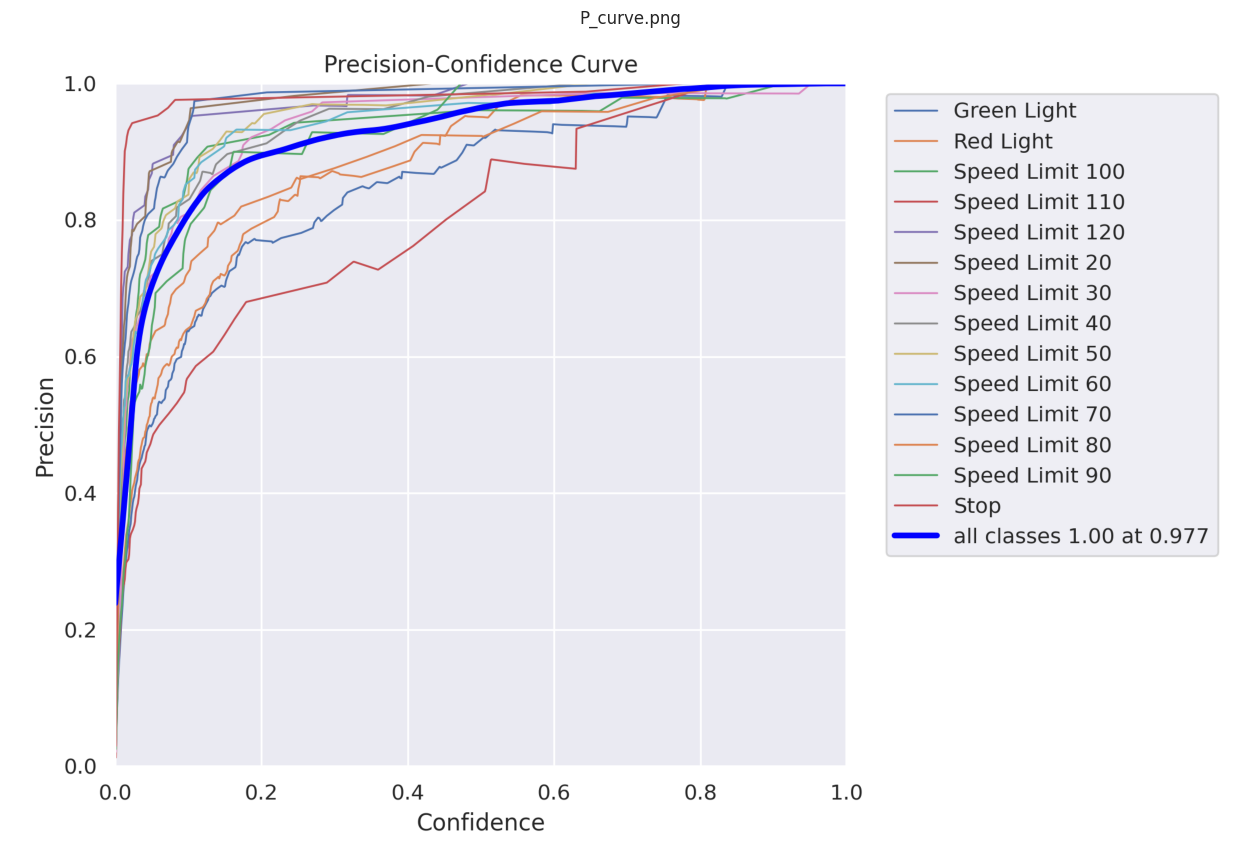

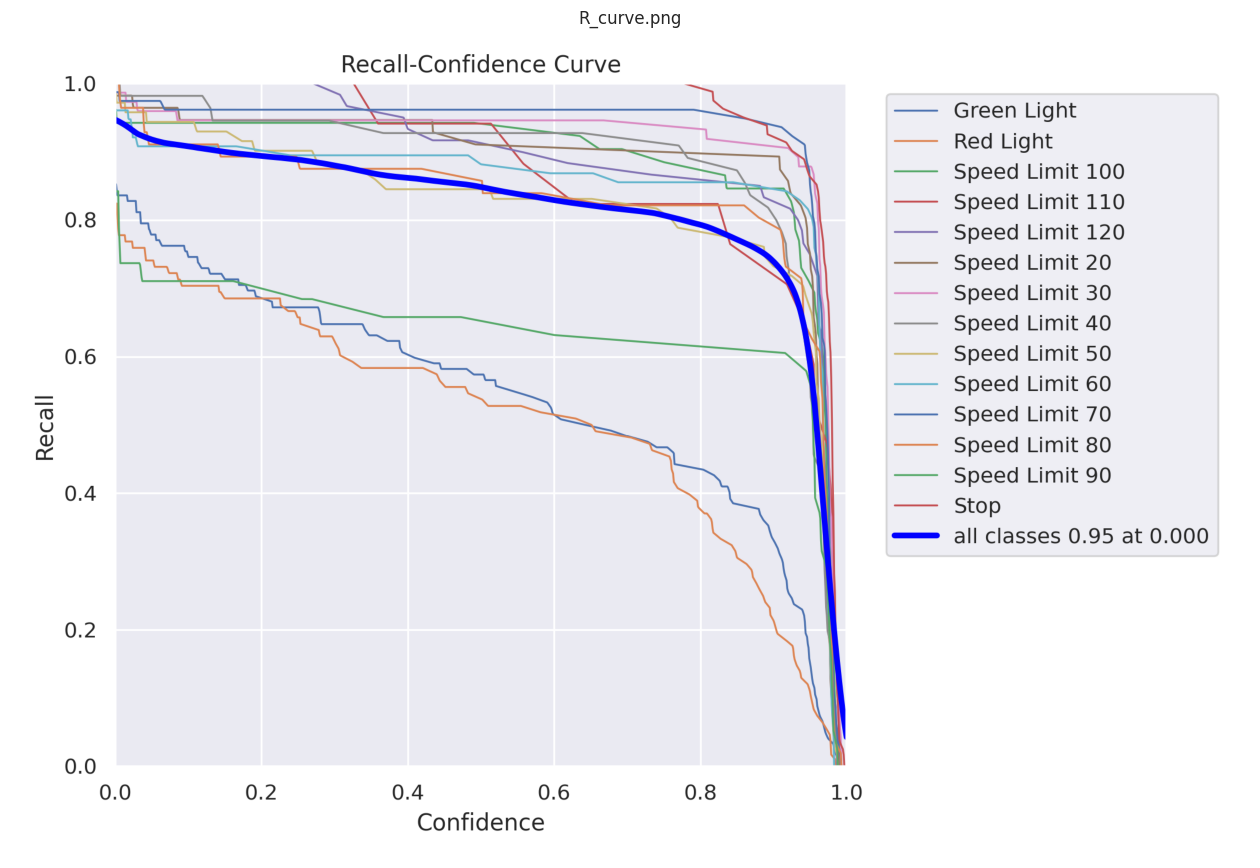

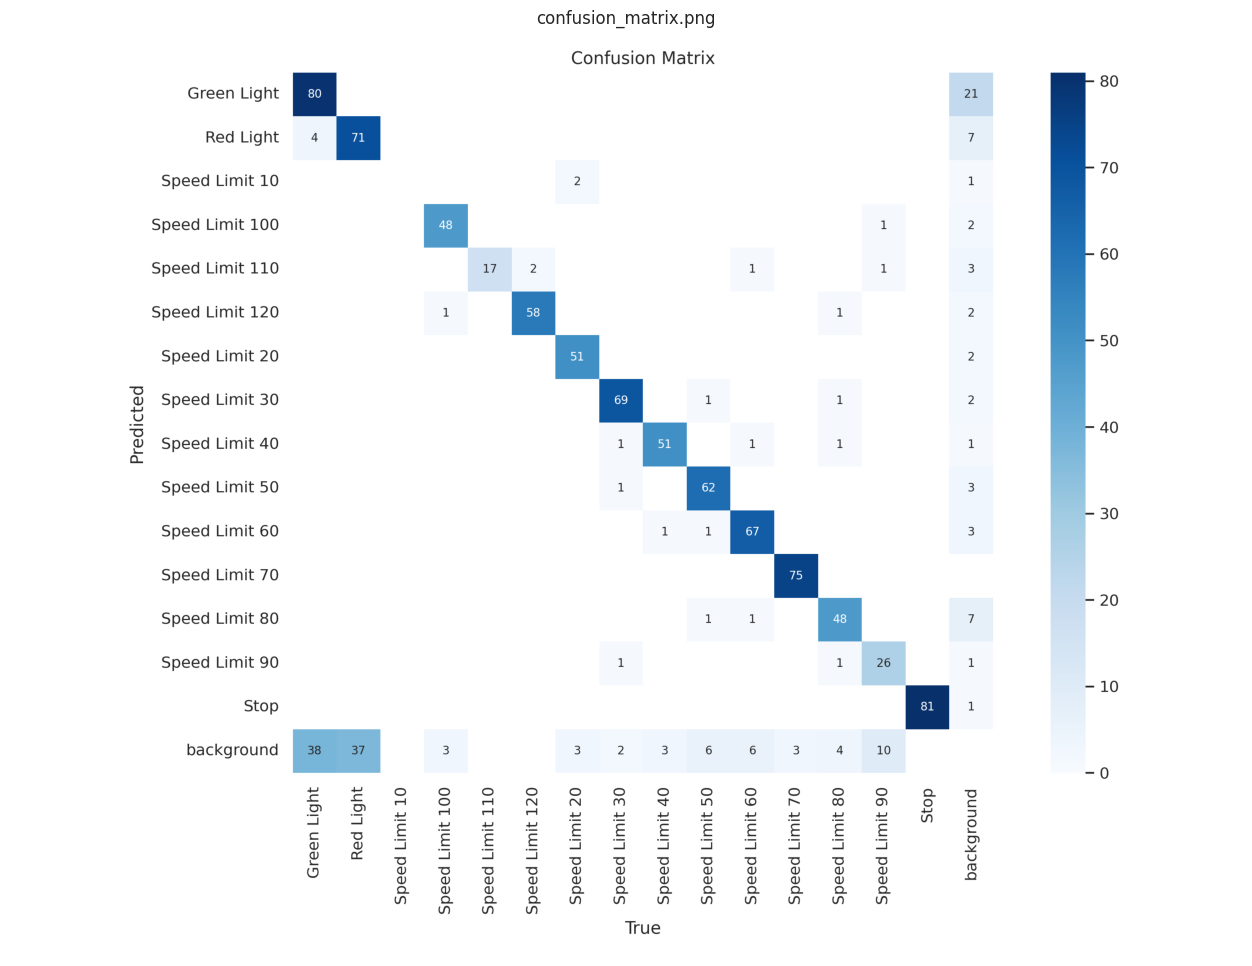

In [ ]:
metrics_base_path = 'runs/detect/train52/'
# Check if each metric file exists
for metric_file in list_of_metrics:
    metric_path = os.path.join(metrics_base_path, metric_file)
    if not os.path.exists(metric_path):
        print(f"File not found: {metric_path}")
        continue

    # Load the image
    image = cv2.imread(metric_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f")Failed to load image: {metric_path}")
        continue

    # Convert BGR (OpenCV default) to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image_rgb)
    plt.title(metric_file)

    # Show the plot
    plt.axis('off')  # Hide axes ticks
    plt.show()



## 4.3. 모델 재설정 - 목차4.2.3.의 모델을 사용

###4.3.1. 모델 불러오기

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

Transferred 355/355 items from pretrained weights


In [ ]:
# 모델 불러오기
model = Final_model.load("/content/runs/detect/train52/weights/best.pt")

Transferred 319/355 items from pretrained weights


###4.3.2. 추가학습

In [ ]:
# 모델 불러오기
model = Final_model.load("/content/runs/detect/train52/weights/best.pt")

# 추가 학습 - 5번에서 드롭아웃비율만 변화
Result_model52 = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 추가로 10 에포크 학습
    imgsz=416,
    batch=128,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률 0.0001
    dropout=0.1,                # 드롭아웃 비율 0.1로 감소
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='SGD'
)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=128, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train522, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train522/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train522
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.68G     0.4429     0.6618     0.8486         95        416: 100%|██████████| 28/28 [01:24<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.15s/it]

                   all        801        944      0.924      0.883       0.92      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.64G     0.4257     0.6536     0.8455         83        416: 100%|██████████| 28/28 [00:57<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.95s/it]

                   all        801        944      0.927       0.88       0.92      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.64G     0.4183     0.6439     0.8425         89        416: 100%|██████████| 28/28 [00:54<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.41s/it]

                   all        801        944      0.922      0.885      0.919      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.64G     0.4179     0.6435     0.8409         87        416: 100%|██████████| 28/28 [00:49<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.67s/it]

                   all        801        944       0.92      0.885       0.92      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.64G     0.4122     0.6359     0.8388         87        416: 100%|██████████| 28/28 [00:56<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:06<00:20,  6.83s/it]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e0875b82b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:18<00:00,  4.71s/it]

                   all        801        944      0.923      0.885      0.921      0.804
EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



5 epochs completed in 0.113 hours.
Optimizer stripped from runs/detect/train522/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train522/weights/best.pt, 6.2MB

Validating runs/detect/train522/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.29s/it]


                   all        801        944      0.922      0.883       0.92      0.804
           Green Light         87        122      0.799      0.648      0.746      0.424
             Red Light         74        108      0.872      0.631      0.733      0.464
       Speed Limit 100         52         52      0.947      0.942      0.944      0.863
       Speed Limit 110         17         17      0.724          1      0.969      0.899
       Speed Limit 120         60         60      0.967      0.992      0.994      0.918
        Speed Limit 20         56         56      0.985      0.946      0.979      0.864
        Speed Limit 30         71         74      0.962      0.946      0.971      0.907
        Speed Limit 40         53         55      0.957      0.945      0.983      0.885
        Speed Limit 50         68         71      0.969      0.885      0.957      0.841
        Speed Limit 60         76         76      0.945      0.895      0.941      0.866
        Speed Limit 7

#### 4.3.2.1. 추가학습1의 valid

In [ ]:
metrics_base_path = 'runs/detect/train522/'

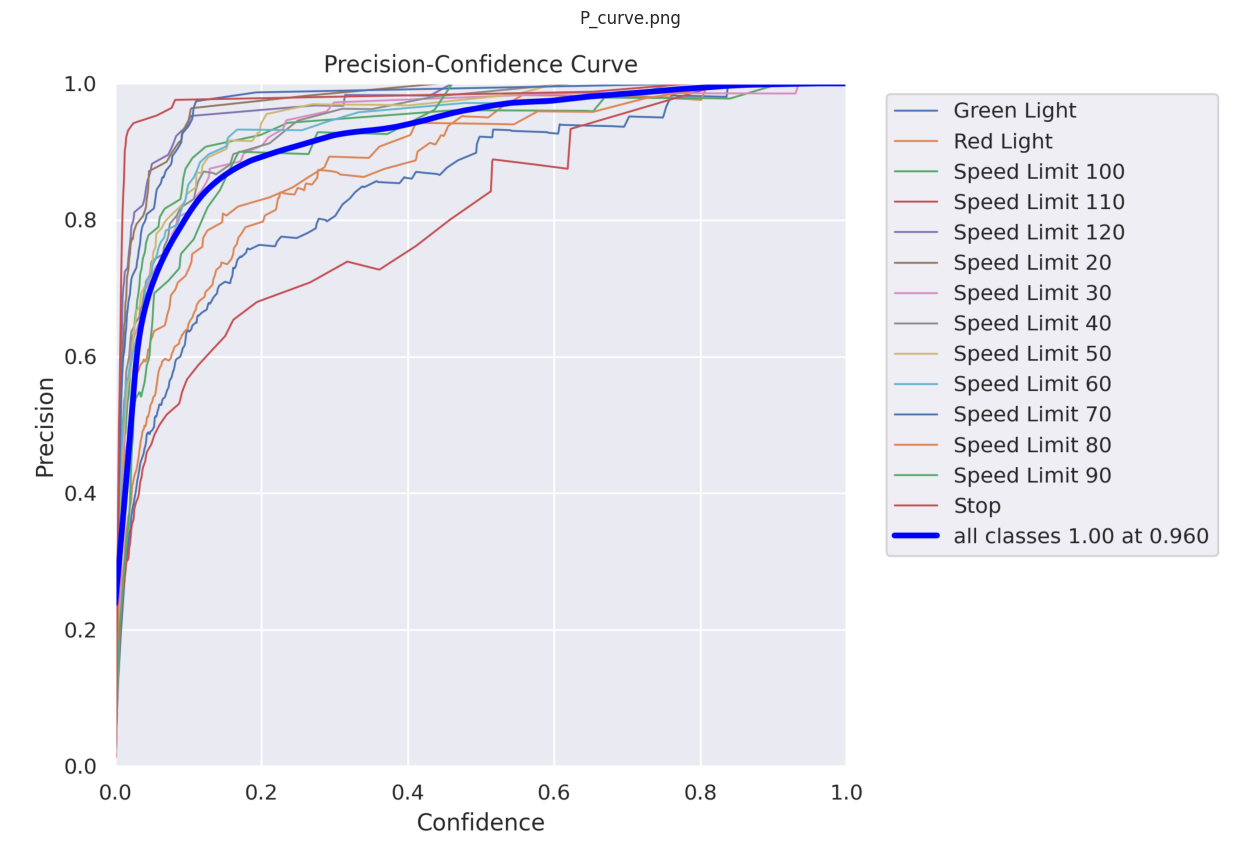

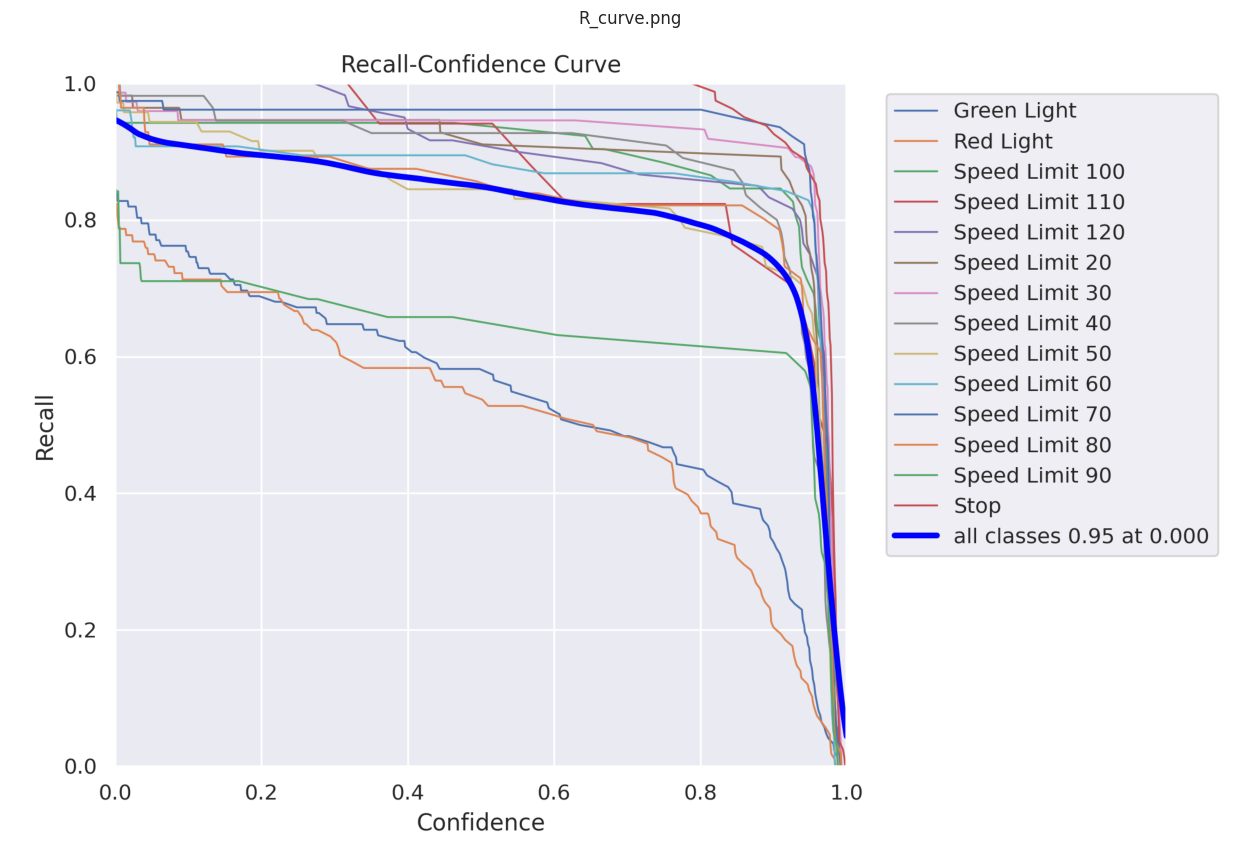

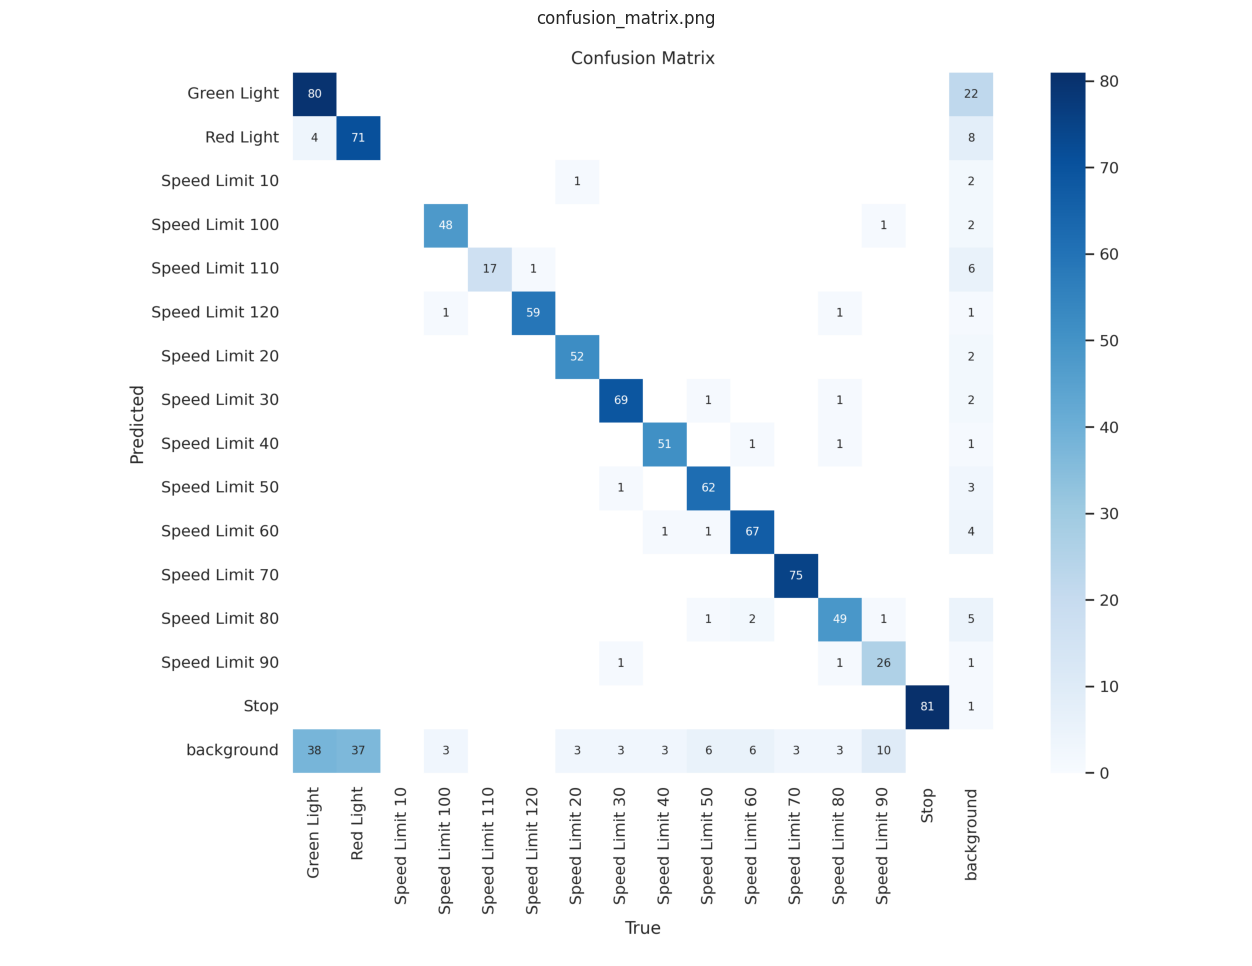

In [ ]:
# Check if each metric file exists
for metric_file in list_of_metrics:
    metric_path = os.path.join(metrics_base_path, metric_file)
    if not os.path.exists(metric_path):
        print(f"File not found: {metric_path}")
        continue

    # Load the image
    image = cv2.imread(metric_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f")Failed to load image: {metric_path}")
        continue

    # Convert BGR (OpenCV default) to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image_rgb)
    plt.title(metric_file)

    # Show the plot
    plt.axis('off')  # Hide axes ticks
    plt.show()



### 4.3.3. 추가학습2

In [ ]:
# 끊겨서 다시 이전거 학습 시작
# 모델 불러오기
model = Final_model.load("/content/runs/detect/train52/weights/best.pt")

# 미리 크게 학습
Result_model52 = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 추가로 10 에포크 학습
    imgsz=416,
    batch=32,                   # 배치 크기 32
    lr0=0.0005,                 # 학습률 0.0005
    dropout=0.2,                # 드롭아웃 비율 0.2
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
#    optimizer='SGD'
#    momentum=0.95               # 0.937 -> 0.95로 변경
)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=32, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.72G     0.4754     0.7056     0.8529         13        416: 100%|██████████| 111/111 [01:18<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.923      0.822      0.899      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.6G     0.5176     0.7552     0.8719         14        416: 100%|██████████| 111/111 [00:52<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all        801        944      0.917      0.823      0.895       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.59G     0.5339     0.7369     0.8771         12        416: 100%|██████████| 111/111 [00:54<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        801        944      0.915      0.809      0.875      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.59G     0.5283     0.7123     0.8728         12        416: 100%|██████████| 111/111 [00:54<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.53it/s]

                   all        801        944      0.877      0.788      0.865      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.61G      0.524     0.6335     0.8723         12        416: 100%|██████████| 111/111 [00:56<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        801        944      0.929      0.832      0.905      0.767
EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



5 epochs completed in 0.104 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.23it/s]


                   all        801        944      0.926      0.823        0.9       0.77
           Green Light         87        122      0.917      0.582      0.715      0.402
             Red Light         74        108      0.938      0.481      0.714      0.418
       Speed Limit 100         52         52        0.9      0.942      0.926      0.825
       Speed Limit 110         17         17      0.838      0.765      0.872      0.774
       Speed Limit 120         60         60      0.966      0.955       0.99      0.897
        Speed Limit 20         56         56      0.982      0.893      0.976       0.83
        Speed Limit 30         71         74      0.963      0.919      0.955      0.885
        Speed Limit 40         53         55      0.859      0.927      0.967      0.849
        Speed Limit 50         68         71          1       0.78      0.929      0.815
        Speed Limit 60         76         76      0.894      0.882      0.933       0.84
        Speed Limit 7

###4.3.4. 추가학습3

In [ ]:
# 모델 불러오기
model = Final_model.load("/content/runs/detect/train52/weights/best.pt")

# 추가 학습 - 4.3.1에서 드롭아웃비율 변화, sgd반영여부 살펴보기
Result_model52 = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 추가로 10 에포크 학습
    imgsz=416,
    batch=128,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률 0.0001
    dropout=0.2,                # 드롭아웃 비율 0.2
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='SGD'
#    momentum=0.95               # 0.937 -> 0.95로 변경
)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=128, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train72, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train72/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train72
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.26G     0.4429     0.6618     0.8486         95        416: 100%|██████████| 28/28 [01:13<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.61s/it]

                   all        801        944      0.924      0.883       0.92      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       8.2G     0.4257     0.6536     0.8455         83        416: 100%|██████████| 28/28 [00:45<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.87s/it]

                   all        801        944      0.927       0.88       0.92      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       8.2G     0.4183     0.6439     0.8425         89        416: 100%|██████████| 28/28 [00:48<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.55s/it]

                   all        801        944      0.922      0.885      0.919      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       8.2G     0.4179     0.6435     0.8409         87        416: 100%|██████████| 28/28 [00:43<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]

                   all        801        944       0.92      0.885       0.92      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       8.2G     0.4122     0.6359     0.8388         87        416: 100%|██████████| 28/28 [00:48<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.07s/it]

                   all        801        944      0.923      0.885      0.921      0.804
EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



5 epochs completed in 0.099 hours.
Optimizer stripped from runs/detect/train72/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train72/weights/best.pt, 6.2MB

Validating runs/detect/train72/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:21<00:00,  5.47s/it]


                   all        801        944      0.922      0.883       0.92      0.804
           Green Light         87        122      0.799      0.648      0.746      0.424
             Red Light         74        108      0.872      0.631      0.733      0.464
       Speed Limit 100         52         52      0.947      0.942      0.944      0.863
       Speed Limit 110         17         17      0.724          1      0.969      0.899
       Speed Limit 120         60         60      0.967      0.992      0.994      0.918
        Speed Limit 20         56         56      0.985      0.946      0.979      0.864
        Speed Limit 30         71         74      0.962      0.946      0.971      0.907
        Speed Limit 40         53         55      0.957      0.945      0.983      0.885
        Speed Limit 50         68         71      0.969      0.885      0.957      0.841
        Speed Limit 60         76         76      0.945      0.895      0.941      0.866
        Speed Limit 7

####4.3.4.1. 해당 모델에서 momentum 변경 학습

In [ ]:
model = Final_model.load('runs/detect/train72/weights/best.pt')
# 추가 학습 -
Result_model6 = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 추가로 10 에포크 학습
    imgsz=416,
    batch=128,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률 0.0001
    dropout=0.2,                # 드롭아웃 비율 0.2
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='SGD',
    momentum=0.95               # 0.937 -> 0.95로 변경
)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=128, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train723, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train723/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.95) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train723
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.86G     0.4417     0.6614     0.8484         95        416: 100%|██████████| 28/28 [01:24<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.11s/it]


                   all        801        944      0.922      0.884       0.92      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.22G     0.4255     0.6535     0.8454         83        416: 100%|██████████| 28/28 [00:56<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.83s/it]

                   all        801        944      0.927       0.88       0.92      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.22G     0.4182     0.6439     0.8425         89        416: 100%|██████████| 28/28 [00:59<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.91s/it]

                   all        801        944      0.921      0.885      0.919      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.22G     0.4181     0.6437     0.8409         87        416: 100%|██████████| 28/28 [00:53<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.77s/it]

                   all        801        944      0.921      0.886       0.92      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.22G     0.4125     0.6358     0.8388         87        416: 100%|██████████| 28/28 [00:51<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.77s/it]

                   all        801        944      0.924      0.882       0.92      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.24G     0.4098     0.6326     0.8398         90        416: 100%|██████████| 28/28 [01:01<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]

                   all        801        944      0.932      0.872      0.918      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.22G     0.4099     0.6294     0.8423         86        416: 100%|██████████| 28/28 [00:53<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.70s/it]

                   all        801        944      0.946      0.865      0.921      0.804
EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 3, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



7 epochs completed in 0.147 hours.
Optimizer stripped from runs/detect/train723/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train723/weights/best.pt, 6.2MB

Validating runs/detect/train723/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.44s/it]


                   all        801        944      0.922      0.885      0.919      0.804
           Green Light         87        122      0.788      0.669      0.744      0.429
             Red Light         74        108      0.849      0.624      0.723      0.459
       Speed Limit 100         52         52      0.951      0.942      0.944      0.863
       Speed Limit 110         17         17      0.739          1      0.972      0.905
       Speed Limit 120         60         60      0.968          1      0.993      0.919
        Speed Limit 20         56         56      0.983      0.946      0.981      0.859
        Speed Limit 30         71         74      0.961      0.946       0.97      0.905
        Speed Limit 40         53         55      0.965      0.945      0.983      0.886
        Speed Limit 50         68         71      0.969      0.877      0.953      0.847
        Speed Limit 60         76         76      0.935      0.895      0.941      0.865
        Speed Limit 7

####4.3.4.2. 모멘텀 변경한 것에 대한 validation

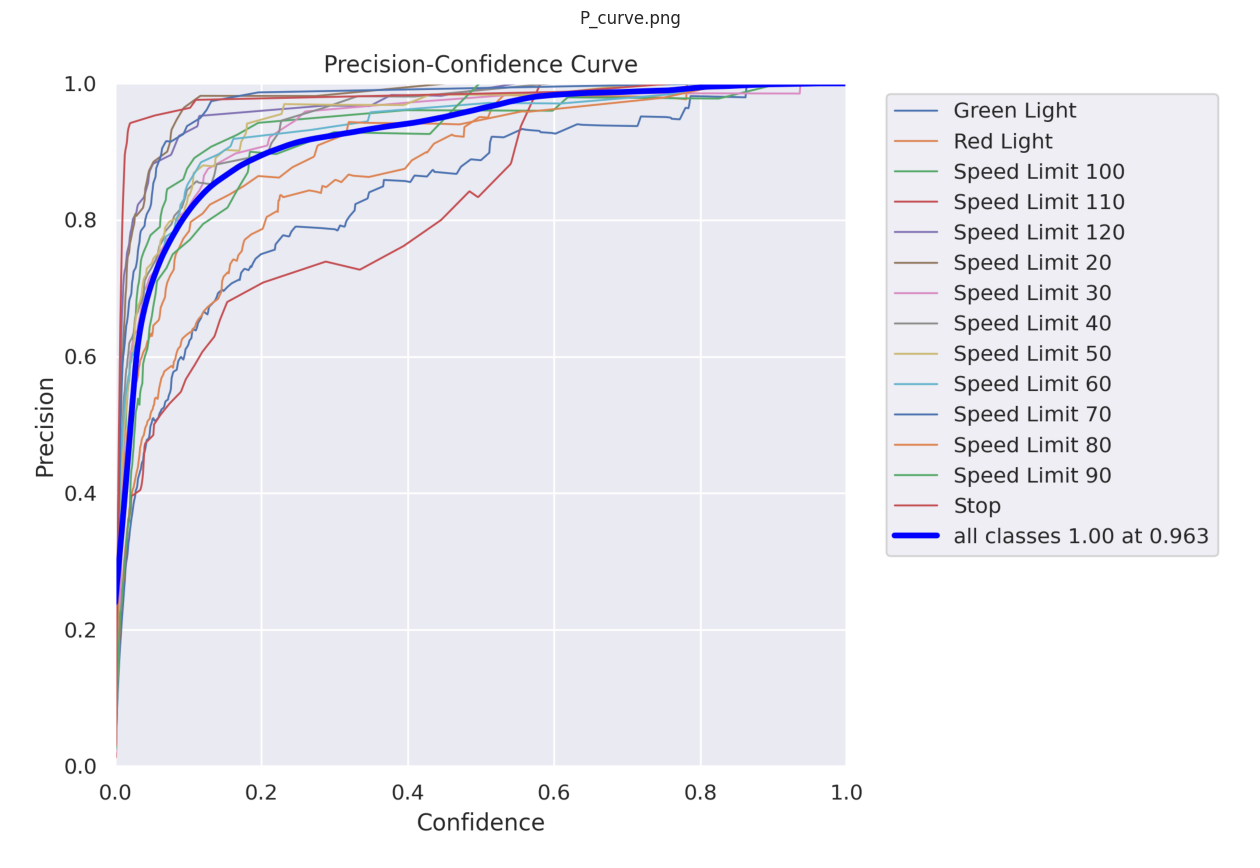

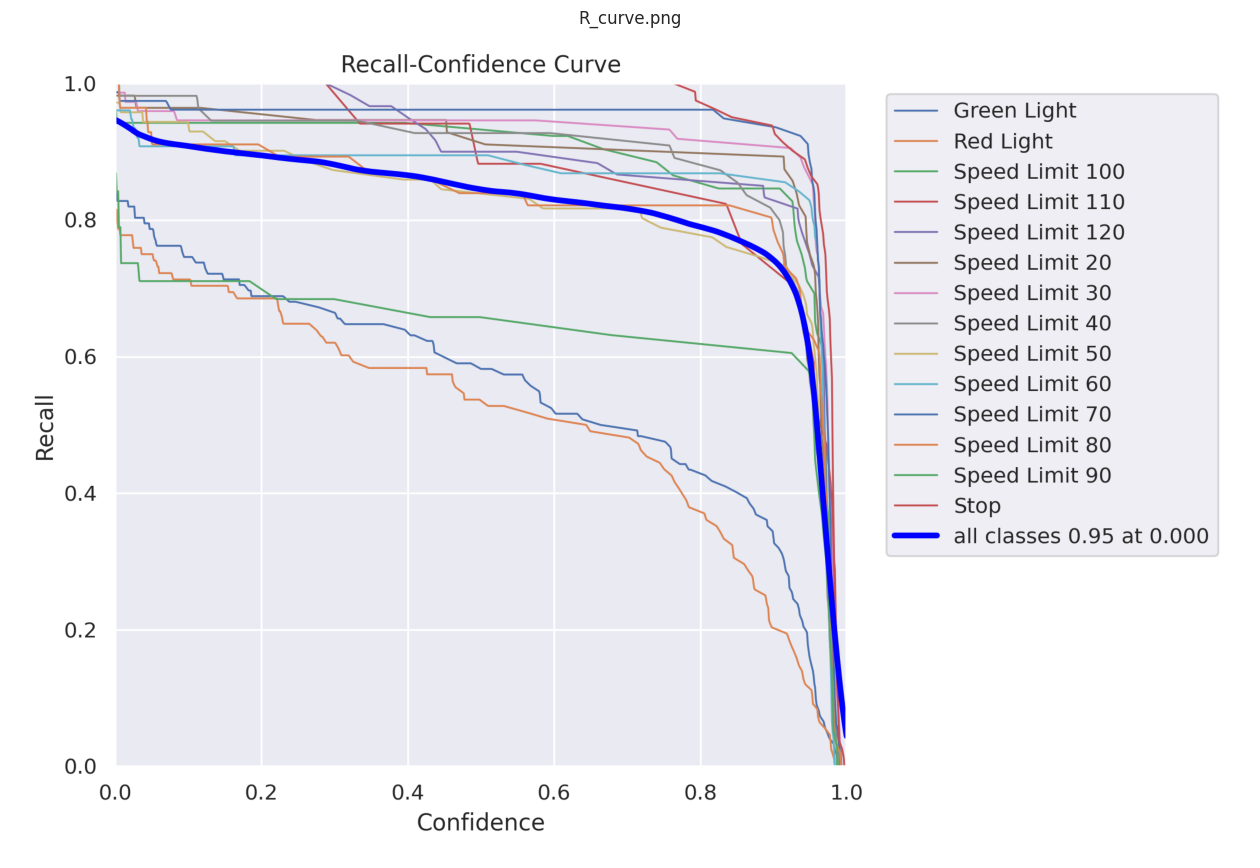

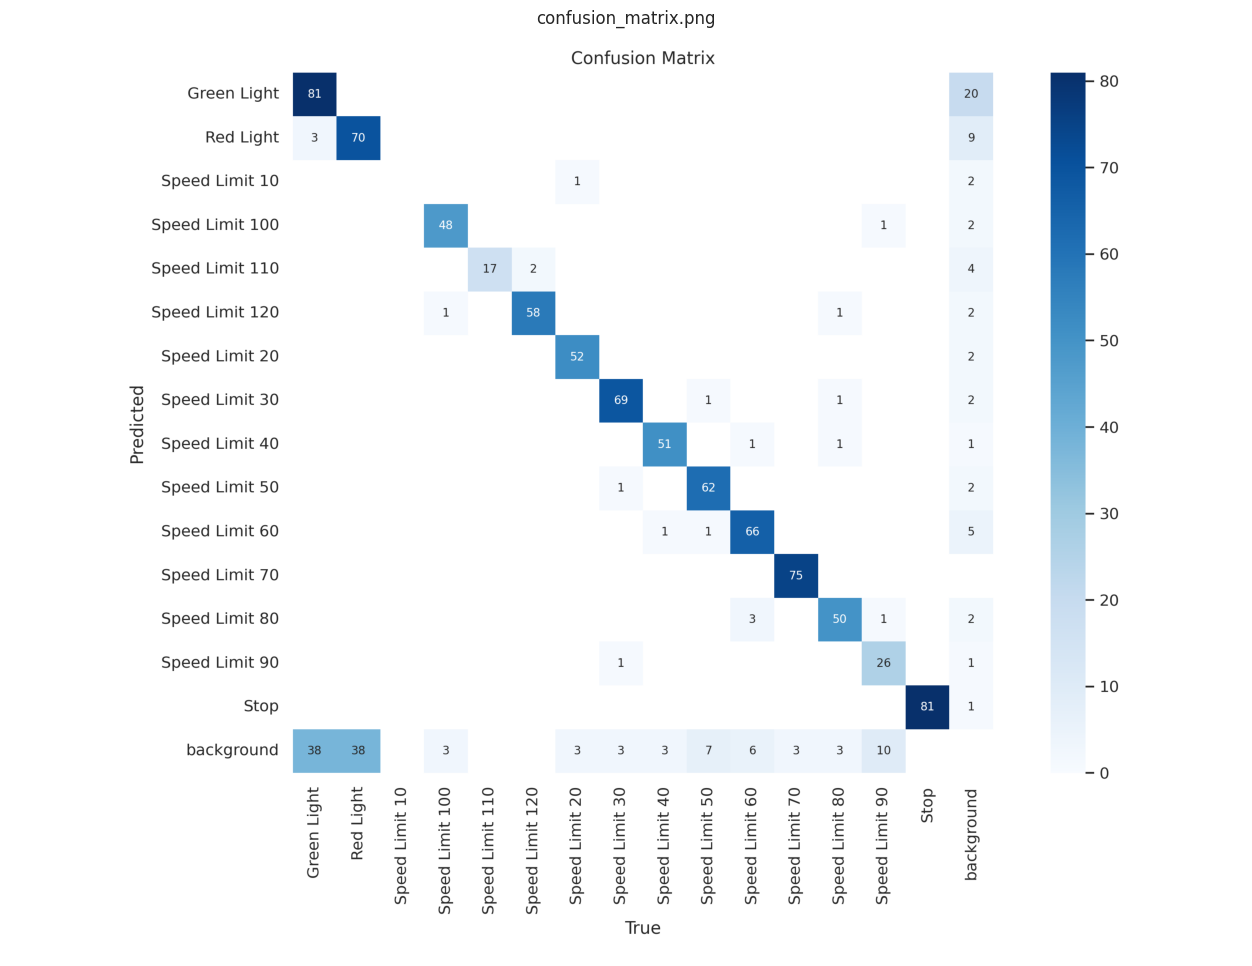

In [ ]:
metrics_base_path = 'runs/detect/train723/'
# Check if each metric file exists
for metric_file in list_of_metrics:
    metric_path = os.path.join(metrics_base_path, metric_file)
    if not os.path.exists(metric_path):
        print(f"File not found: {metric_path}")
        continue

    # Load the image
    image = cv2.imread(metric_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f")Failed to load image: {metric_path}")
        continue

    # Convert BGR (OpenCV default) to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image_rgb)
    plt.title(metric_file)

    # Show the plot
    plt.axis('off')  # Hide axes ticks
    plt.show()



#### 4.3.4.3. 모멘텀 변경 다시 제외하고 추가학습 진행

In [ ]:
### 학습률 조정 ### 모멘텀 제외
model = Final_model.load('runs/detect/train723/weights/best.pt')
# 추가 학습 -
Result_model6 = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 추가로 10 에포크 학습
    imgsz=416,
    batch=128,                   # 배치 크기 128
    lr0=0.0002,                 # 학습률 0.0002로 조정
    dropout=0.2,                # 드롭아웃 비율 0.2
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='SGD',
    #momentum=0.95               # 0.937 -> 0.95로 변경
)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=128, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train7232, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7232/labels.jpg... 
optimizer: SGD(lr=0.0002, momentum=0.95) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train7232
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.24G     0.4409     0.6601     0.8482         95        416: 100%|██████████| 28/28 [01:21<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]

                   all        801        944      0.924      0.881      0.921      0.804
